<a href="https://colab.research.google.com/github/oleksandragolub/progetto-architettura-dati-with-ml/blob/main/label_noise_with_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Architettura Dati**
---
---

Università degli Studi Milano Bicocca \
CdLM Informatica — A.A 2024/2025

---
---

#### **Componenti del gruppo:**
— Oleksandra Golub (856706)

---
---



## **Esperimento: Label noise + Missing values**
---
---


### **Librerie e strumenti per il preprocessing e la modellazione in ML**



Queste righe di codice importano le librerie necessarie per il preprocessing dei dati, la gestione dei dataset e la loro visualizzazione, oltre a strumenti per il bilanciamento dei dati, l'implementazione di modelli di machine learning e la gestione dei flussi tramite una pipeline:
- **kagglehub** è una libreria per scaricare dataset direttamente da Kaggle (permette di scaricare automaticamente i dati senza doverli caricare manualmente).
- il modulo **os** permette di interagire con il sistema operativo (utile per verificare la posizione di un dataset scaricato).
- **pandas** è una libreria per la gestione e manipolazione dei dataset (permette di leggere, analizzare e trasformare i dati in formato tabellare).
- **matplotlib.pyplot** è una libreria per creare grafici e visualizzazioni (aiuta a visualizzare distribuzioni, istogrammi e grafici di correlazione).
- **seaborn** è una libreria per la visualizzazione avanzata dei dati basata su **matplotlib** (aiuta a creare grafici più leggibili e dettagliati per analizzare le relazioni tra le variabili).
- **numpy** è una libreria per il calcolo numerico e la gestione degli array (utilizzata per manipolare dati numerici, eseguire calcoli e operazioni vettorial).
- **matplotlib.ticker (mtick)** permette di personalizzare la formattazione degli assi nei grafici, ad esempio per mostrare percentuali.
- il modulo **scipy.stats** fornisce funzioni per calcoli statistici avanzati. In particolare calcola l'intervallo di confidenza per una distribuzione t di Student.
- **IPython.display.display** permette di visualizzare oggetti (come DataFrame o grafici) direttamente nei notebook, utile per un output più leggibile.
- **copy** fornisce strumenti per creare copie indipendenti di oggetti complessi, utile per evitare modifiche non volute durante l’elaborazione dei dati.
- **SMOTE** (Synthetic Minority Over-sampling Technique) è una tecnica di oversampling per bilanciare dataset sbilanciati. Genera nuovi esempi sintetici della classe minoritaria (es. se i pazienti diabetici sono meno numerosi, SMOTE genera nuovi dati simili per bilanciare il dataset).
- **StandardScaler** e **PowerTransformer** sono strumenti per trasformare e normalizzare i dati:
  1.   **StandardScaler** ridimensiona i dati in modo che abbiano *media 0* e *deviazione standard 1* (necessario per molti algoritmi di ML).
  2.   **PowerTransformer** applica una trasformazione (es. logaritmica) per rendere più normale la distribuzione dei dati.
- **MinMaxScaler** trasforma i dati normalizzandoli in un intervallo specifico, tipicamente tra 0 e 1. Utile quando le feature hanno scale diverse.
- **enable_iterative_imputer** è necessario per abilitare **IterativeImputer**, che è ancora un'API sperimentale in **scikit-learn** (permette di eseguire un'imputazione avanzata dei valori mancanti stimandoli in base alle altre feature).
- **IterativeImputer** è un metodo per riempire i valori mancanti nei dati in modo intelligente (stima i valori basandosi sulle altre feature, anziché usare semplici medie o mediane).
- **SimpleImputer** sostituisce i valori mancanti con una strategia semplice (es. media, mediana, valore più frequente).
- **PCA** (analisi delle componenti principali) è una tecnica di riduzione della dimensionalità che trasforma le feature di un dataset in nuove variabili (componenti principali), preservando la massima varianza possibile.
- **Axes3D** è un modulo di **Matplotlib** che permette di creare grafici tridimensionali. Viene spesso usato con PCA per rappresentare i dati in uno spazio ridotto a 3 dimensioni.
- **train_test_split** è una funzione di **scikit-learn** per suddividere i dati in training set e test set (permette di addestrare il modello su una parte dei dati e testarlo su un'altra parte per valutarne le prestazioni).

Strumenti per la gestione della cross-validation e l'ottimizzazione del modello:
- **KFold** divide il dataset in k sottoinsiemi (fold) per valutare le performance del modello in modo più robusto.
- **StratifiedKFold** è un variante di KFold che mantiene la stessa distribuzione delle classi in ogni fold, utile per dataset sbilanciati.
- **cross_val_score** esegue la cross-validation e restituisce i punteggi delle metriche scelte per ogni fold.
- **cross_validate** permette di valutare più metriche contemporaneamente durante la cross-validation.
- **GridSearchCV** esegue una ricerca esaustiva dei migliori iperparametri testando tutte le combinazioni specificate.
- **RandomizedSearchCV** simile a GridSearchCV, ma esplora casualmente solo alcune combinazioni, rendendolo più veloce.
- **uniform, randint, loguniform** da **scipy.stats** definiscono distribuzioni casuali per la ricerca degli iperparametri in **RandomizedSearchCV**.
- **make_scorer** consente di creare metriche personalizzate per la valutazione del modello.
- **Patch** viene usato per personalizzare le legende nei grafici.
- **cm (colormap)** è la libreria di **matplotlib** per gestire le mappe di colori nei grafici.

Modelli di Machine Learning:
- **DecisionTreeClassifier** implementa un albero di decisione, un modello che suddivide i dati in base a domande sequenziali per fare previsioni.
- **plot_tree** è una funzione che permette di visualizzare la struttura dell'albero di decisione addestrato. È utile per interpretare il modello, capire quali feature sono state utilizzate per le suddivisioni e come il modello prende le decisioni.
- **LogisticRegression** è un modello statistico di classificazione binaria basato sulla funzione logistica (sigmoide). Stima la probabilità che un'osservazione appartenga a una classe specifica.
- **SVC (Support Vector Classifier)** è un potente modello per la classificazione. Trova un iperpiano ottimale che separa le classi massimizzando la distanza tra loro. Può utilizzare diversi kernel (lineare, polinomiale, RBF, ecc).
- **GaussianNB (Naive Bayes Gaussiano)** è basato sul **Teorema di Bayes**, assume che le feature siano indipendenti tra loro. La variante GaussianNB è utilizzata quando le feature seguono una distribuzione normale (gaussiana). È molto veloce e adatto a dataset di grandi dimensioni.
- **RandomForestClassifier** è un modello ensemble che combina più alberi di decisione per migliorare l'accuratezza e ridurre l'overfitting. Ogni albero riceve un sottoinsieme casuale dei dati (bagging) e fa una previsione. Il risultato finale è dato dalla maggioranza delle previsioni degli alberi. È molto potente, flessibile e meno sensibile ai dati rumorosi.
- **MLPClassifier** implementa una rete neurale feedforward (Multilayer Perceptron), utile per catturare relazioni complesse nei dati.

Metriche di valutazione dei modelli:
- **accuracy_score(y_true, y_pred)** serve per calcolare l'accuratezza, ossia la percentuale di previsioni corrette.
- **precision_score(y_true, y_pred)** serve per indicare la percentuale di predizioni corrette tra quelle che il modello ha classificato come positive. Utile per problemi con classi sbilanciate.
- **recall_score(y_true, y_pred)** serve per misurare quanti dei veri positivi il modello è riuscito a identificare.
- **f1_score(y_true, y_pred)** serve per ottenere la media armonica tra precisione e recall. Utile quando è importante trovare un bilanciamento tra precisione e recall.
- **confusion_matrix(y_true, y_pred)** serve per creare una matrice di confusione, che mostra il numero di predizioni corrette e errate suddivise per classe. Utile per analizzare dove il modello sta sbagliando.
- **roc_auc_score** calcola direttamente l’AUC (Area Under the ROC Curve), utile per confrontare modelli di classificazione binaria.
- **roc_curve(y_true, y_score)** misura la capacità di un modello di classificazione binaria nel distinguere tra classi positive e negative. Mostra la relazione tra il True Positive Rate (TPR) e il False Positive Rate (FPR) a diversi livelli di soglia.
- **auc(fpr, tpr)** è una metrica (Area Under Curve) che misura l'area sotto la curva ROC (Receiver Operating Characteristic). Un valore di AUC=1 indica un classificatore perfetto, mentre AUC=0.5 indica un classificatore casuale. Da notare che L'AUC è particolarmente utile quando si confrontano diversi modelli: più è alto, migliore è la capacità predittiva del modello.
- **pearsonr** calcola il coefficiente di correlazione di Pearson tra due variabili, utile per analizzare la relazione lineare tra feature.

Strumenti per l'uso di pipeline e gestione dei flussi:
- **Pipeline (da sklearn.pipeline)** consente di concatenare più passaggi (preprocessing + modello) in un’unica struttura ordinata e riutilizzabile.
- **ImbPipeline (da imblearn.pipeline)** è una versione della pipeline che supporta correttamente le operazioni di bilanciamento come SMOTE al suo interno.




In [2]:
import kagglehub
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint, loguniform, pearsonr

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, make_scorer
from matplotlib.patches import Patch
from matplotlib import cm
from sklearn.metrics import roc_auc_score

import matplotlib.ticker as mtick  # necessario per formattare gli assi
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from IPython.display import display
import copy

---
---
### **Dataset**


Queste righe di codice servono per scaricare, caricare e verificare il dataset sui pazienti diabetici:
1. Scaricamento del dataset da Kaggle
  - si utilizza `kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")` per scaricare automaticamente il dataset "`diabetes-dataset-using-many-medical-metrics`" da [Kaggle](https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data).
  - la variabile `dataset_path` conterrà il percorso della cartella in cui il dataset è stato salvato.
  - il percorso del dataset viene stampato per verificare che l'operazione sia riuscita correttamente.

2. Definizione del percorso locale del dataset
  - `dataset_path` viene definito manualmente per specificare dove è stato scaricato il dataset.
  - normalmente, kagglehub salva i file in una cartella cache, quindi impostiamo manualmente il percorso corretto per evitarne la ricerca.
  - alcune versioni di kagglehub non restituiscono il percorso completo del dataset, quindi questa operazione aiuta a evitare problemi di accesso ai file.

3. Verifica dei file scaricati
  - `os.listdir(dataset_path)` stampa l'elenco dei file presenti nella cartella del dataset.
  - questo permette di verificare quali file sono stati effettivamente scaricati.
  - è utile soprattutto quando non si è sicuri del nome esatto del file CSV nel dataset.

4. Caricamento del dataset in Pandas
  - `pd.read_csv(dataset_path + "/diabetes (1).csv")` legge il file CSV e lo carica in un DataFrame Pandas.

Ora il dataset è pronto per essere esplorato e analizzato con Pandas!

In [3]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")
print("Il dataset è stato scaricato in:", dataset_path)

# Use the path returned by kagglehub.dataset_download instead of a hardcoded path
# dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

100%|██████████| 8.92k/8.92k [00:00<00:00, 6.17MB/s]

Extracting files...
Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


* `df.head()` restituisce le prime 5 righe (di default) del DataFrame Pandas. È utile per verificare se i dati sono stati caricati correttamente e per analizzare un'anteprima del dataset.

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*  `df` visualizza tutto il dataset presente nel DataFrame Pandas.

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### **Casting delle colonne e/o target**


È essenziale verificare e, se necessario, effettuare il cast dei tipi delle feature e del target. Questo passaggio garantisce che i dati vengano interpretati correttamente durante le analisi, evitando errori dovuti a una rappresentazione errata o incoerente dei tipi di dati disponibili.

*   `df.dtypes` determina se una colonna contiene numeri interi (int64), numeri decimali (float64), stringhe (object), valori booleani (bool), o categorie (category).
*   `dtype: object` significa che l'elenco dei tipi di dato è memorizzato come un oggetto generico in Pandas.

In [6]:
# Tipi di dato per capire se servono cast
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Da notare che la colonna `Outcome` deve essere castata a `category`, perché rappresenta una variabile categorica (classi 0 e 1).

Per il resto delle colonne non è necessario alcun cast. Le variabili sono già correttamente rappresentate come float64 per valori continui o int64 per valori discreti.

In [7]:
# Cast della colonna Outcome a category
df['Outcome'] = df['Outcome'].astype('category')

# Verifica dei tipi aggiornati
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,category


#### **Controllo iniziale del dataset**


Questa sezione include una serie di analisi preliminari per comprendere la struttura, la distribuzione e le relazioni tra le feature del dataset prima di qualsiasi preprocessing.

*   `df.shape` mostra il numero di righe e colonne del dataset.


In [8]:
df.shape

(768, 9)

* `df.isnull().sum()` è un comando che consente di verificare la presenza di valori mancanti (nulli) in ogni colonna di un DataFrame.

In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Siccome non è necessario eliminare i valori nulli, procediamo con:

* `df.duplicated()` è un comando che permette di identificare il numero di righe duplicate all'interno di un DataFrame.

In [10]:
df.duplicated().sum()

np.int64(0)

Siccome non è necessario eliminare i valori duplicati, procediamo con:
*  `df.info()` fornisce informazioni riassuntive sulla struttura del DataFrame Pandas, dove:
  - `<class 'pandas.core.frame.DataFrame'>` indica che il dataset è un DataFrame Pandas.
  - `RangeIndex: 768 entries, 0 to 767` indica che il dataset ha 768 righe, numerate da 0 a 767.
  - `Data columns (total 9 columns)`indica che il dataset contiene 9 colonne.
  - Dettagli delle colonne includono i nominativi delle colonne, Non-Null Count (si vede che tutte le colonne hanno 768 valori non nulli, quindi non ci sono valori mancanti) e Dtype (per indicare colonne che contengono numeri interi e colonne che contengono numeri decimali)
  - `dtypes: category(1), float64(2), int64(6)`,  indica che nel dataset ci sono 1 colonna con tipo categorico, 2 colonne con tipo float64 (numeri decimali) e 6 colonne con tipo int64 (numeri interi).
  - `memory usage: 54.1 KB`indica che il dataset occupa 49.0 KB di memoria.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


#### **Descrizione del dataset**


Il dataset analizza le caratteristiche cliniche di pazienti per la classificazione binaria della presenza o assenza di diabete. Ogni riga rappresenta un paziente, mentre le colonne contengono misurazioni mediche e dati anamnestici.

##### **Feature del dataset**
Le variabili disponibili nel dataset includono misurazioni fisiologiche, anamnestiche e indici metabolici, espressi come valori numerici continui o interi:

- Pregnancies: numero di gravidanze della paziente (solo per donne, nei dati non è specificato il sesso).
- Glucose (mg/dL): livello di glucosio nel sangue a digiuno.
- BloodPressure (mmHg): pressione arteriosa diastolica.
- SkinThickness (mm): spessore della pelle del tricipite, indicativo del grasso corporeo sottocutaneo.
- Insulin (µU/mL): livello di insulina nel sangue.
- BMI (kg/m²): indice di massa corporea, utile per valutare il peso corporeo rispetto all'altezza.
- DiabetesPedigreeFunction: funzione che stima la probabilità di sviluppare diabete in base alla storia familiare (valori più alti indicano una maggiore predisposizione genetica).
- Age (anni): età del paziente.
- Outcome: variabile target (0 = non diabetico, 1 = diabetico).

##### **Tipologia dei dati**
- Le feature sono numeriche continue e discrete.
- La variabile Outcome è categorica binaria (0/1).

##### **Obiettivo dell’analisi**
L’obiettivo del dataset è costruire un modello di classificazione binaria per predire la presenza di diabete in base ai valori clinici dei pazienti.

#### **Analisi del dataset**


##### **Distribuzione delle classi nel dataset**


L'analisi della distribuzione delle classi nel dataset è essenziale per comprendere eventuali squilibri, perciò procediamo con:

* `df["Outcome"].value_counts()` restituisce il conteggio di ogni valore unico presente nella colonna `Outcome` del DataFrame Pandas. Questo è utile per verificare la distribuzione delle classi nel dataset e **determinare se è bilanciato o meno**.
  - colonna `Outcome` del DataFrame rappresenta l'etichetta target, dove `1` indica la presenza di diabete, mentre `0` indica l'assenza di diabete.
  - `.value_counts()` conta il numero di occorrenze di ciascun valore unico presente nella colonna.


In [12]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


* sns.countplot(x='Outcome', data=df):
  - si usa **seaborn**, una libreria per la visualizzazione dei dati, per creare un grafico a barre che conta la frequenza di ciascun valore nella colonna `Outcome`.
  - `x='Outcome'` specifica che i valori della colonna `Outcome` saranno visualizzati sull'asse x.
  - `data=df` specifica che i dati sono contenuti nel DataFrame `df`.

In altre parole, questo blocco di codice è usato per visualizzare graficamente la distribuzione delle classi nella colonna `Outcome` del dataset. Questa distribuzione rappresenta il bilanciamento tra i valori target, ossia `0` (assenza di diabete) e `1` (presenza di diabete).

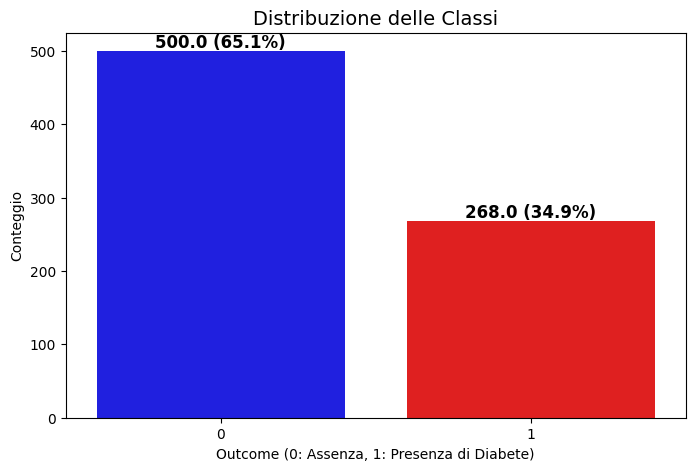

In [13]:
# Creiamo il grafico con conteggio delle classi
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Outcome', data=df, hue='Outcome', palette=['blue', 'red'], legend=False)

# Impostiamo titolo e assi
plt.title("Distribuzione delle Classi", size=14)
plt.xlabel("Outcome (0: Assenza, 1: Presenza di Diabete)")
plt.ylabel("Conteggio")

# Calcoliamo il numero totale di esempi
total = len(df)

# Aggiungiamo le etichette con la percentuale sopra ogni barra
for p in ax.patches:
    height = p.get_height()  # Altezza della barra
    if height > 0:
        percentage = '{:.1f}%'.format(100 * height / total)  # Percentuale
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # Posizione del testo
                f'{height} ({percentage})',
                ha="center", fontsize=12, fontweight="bold", color="black")

# Mostriamo il grafico
plt.show()


Interpretazione:
  - Valore 0 (assenza di diabete): si verifica 500 volte nel dataset.
  - Valore 1 (presenza di diabete): si verifica 268 volte nel dataset. \

Dunque, questo mostra che **il dataset non è bilanciato**, perché la classe 0 (assenza di diabete) è molto più numerosa della classe 1 (presenza di diabete). Questa situazione può influenzare negativamente i modelli di machine learning, rendendoli meno efficaci nel predire la classe meno rappresentata.


##### **Dettagli del dataset**


Andando avanti con l'analisi dei dettagli del dataset, possiamo individuare diverse anomalie nei dati, perciò procediamo con:

- `df.describe()` mostra le statistiche principali di ogni feature numerica:
media, deviazione standard, minimo, massimo, quartili (25%, 50%, 75%).
Aiuta a individuare valori anomali (outlier) o distribuzioni non bilanciate.

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Conclusioni:
- I **valori 0** in Glucose, BloodPressure e BMI sono chiaramente **errori** e vanno sostituiti.
- SkinThickness e Insulin **potrebbero contenere** veri **valori nulli**, ma bisogna verificare più dettagliatamente le colonne.
- Gli altri dati **non mostrano anomalie** evidenti.

Per adesso stabiliamo che i **valori 0** in Glucose, BloodPressure e BMI devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti SENZA diabete**:

In [15]:
# Statistiche per pazienti SENZA diabete
df_no_diabetes = df[df['Outcome'] == 0]
print("Statistiche per pazienti senza diabete:")
df_no_diabetes.describe()

Statistiche per pazienti senza diabete:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


Conclusioni:
- L'insulina media è **anormalmente bassa**:
  - Il **25° percentile e il minimo sono 0**, il che suggerisce **errori nei dati**.
  - In un paziente sano, l'insulina a digiuno **non dovrebbe mai essere zero**!

- Molti valori di SkinThickness sono **pari a 0**:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti sani ha **SkinThickness = 0**.
  - Questo **è anormale**, poiché lo spessore cutaneo **non dovrebbe mai essere esattamente 0** negli individui sani.

- Altri parametri sembrano coerenti:
  - Glucose indica la media di 109.98, nella norma per non diabetici.
  - BloodPressure indica la media di 68.19, valore realistico.
  - BMI indica la media di 30.30, leggermente sopra la norma (sovrappeso).
  - Age indica la media di 31.19, con un intervallo tra 21 e 81 anni.

Questo significa che **i valori 0** di Insulin e SkinThickness **degli individui sani** devono essere trattati come **dati mancanti** e **gestiti nel preprocessing**.

Adesso analizziamo le statistiche per **pazienti CON diabete**:

In [16]:
# Statistiche per pazienti CON diabete
df_diabetes = df[df['Outcome'] == 1]
print("\nStatistiche per pazienti con diabete:")
df_diabetes.describe()


Statistiche per pazienti con diabete:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


Conclusioni:
- Molti valori di Insulin sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° e 50° percentile sono 0**, il che significa che **almeno il 50%** dei pazienti diabetici ha **Insulin = 0**.
  - Questo **è anomalo**, perché nei pazienti diabetici (soprattutto quelli **con diabete di tipo 2**) i livelli di insulina sono generalmente **più alti** a causa dell'insulino-resistenza.
  - Tuttavia, se **la maggior parte dei dati** proviene da pazienti con **diabete di tipo 1**, allora è plausibile, poiché in questi soggetti il pancreas **non produce insulina** o ne **produce quantità minime**.

- Molti valori di SkinThickness sono 0 per i diabetici:
  - Il **minimo è 0** e il **25° percentile è 0**, il che significa che **almeno il 25%** dei pazienti diabetici ha **SkinThickness = 0**.
  - Questo è **potenzialmente un errore** nei dati, perché lo spessore cutaneo **non dovrebbe essere esattamente 0**.
  - Tuttavia, **è possibile** che alcuni pazienti diabetici abbiano effettivamente **un livello di grasso sottocutaneo molto basso**, soprattutto se **soffrono di distrofia lipoatrofica** o **perdita di massa grassa dovuta a diabete scarsamente controllato**.

- Altri parametri sembrano coerenti.

Dunque, scegliemo di **non gestire** i casi di **Insulin = 0** e **SkinThickness = 0** per gli **individui diabetici**.


##### **Statistiche del dataset**


Le statistiche di skewness (asimmetria) e kurtosis (curtosi) ci dicono quali variabili hanno una distribuzione non normale e necessitano di trasformazioni nella fase di preprocessing per migliorare la qualità del modello.

Procediamo con l'analisi della Skewness (Asimmetria):

- `skew()` indica quanto la distribuzione è sbilanciata a destra o a sinistra:
  - **Skewness > 0** significa la distribuzione sbilanciata **a destra** (coda più lunga a destra).
  - **Skewness < 0** significa la distribuzione sbilanciata **a sinistra** (coda più lunga a sinistra).

In [17]:
# Selezioniamo solo le colonne numeriche (escludendo 'Outcome')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calcoliamo la skewness per le feature numeriche
print("Skewness (Asimmetria):")
df[numeric_columns].skew()

Skewness (Asimmetria):


,0
Pregnancies,0.901674
Glucose,0.173754
BloodPressure,-1.843608
SkinThickness,0.109372
Insulin,2.272251
BMI,-0.428982
DiabetesPedigreeFunction,1.919911
Age,1.129597


Conclusioni:
- Pregnancies e Age sono le variabili più **sbilanciate a destra**, quindi potremmo **applicare trasformazioni logaritmiche o sqrt** per renderle più normali.
- Glucose e BMI hanno una **lieve asimmetria**, quindi sono **quasi normali**.
- BloodPressure, SkinThickness e Insulin sono **quasi simmetriche** e **non necessitano di trasformazioni**.


Andando avanti con l'analisi della Kurtosis (Curtosi):
- `.kurtosis()` indica la forma della distribuzione rispetto alla normale:
  - **Kurtosis > 0** indica la distribuzione leptocurtica (più appuntita, più valori concentrati al centro e più code).
  - **Kurtosis < 0** indica la distribuzione platicurtica (più piatta, meno concentrata al centro).

In [18]:
# Calcoliamo la kurtosis per le feature numeriche
print("\nKurtosis (Curtosi):")
df[numeric_columns].kurtosis()


Kurtosis (Curtosi):


,0
Pregnancies,0.159220
Glucose,0.640780
BloodPressure,5.180157
SkinThickness,-0.520072
Insulin,7.214260
BMI,3.290443
DiabetesPedigreeFunction,5.594954
Age,0.643159


Conclusioni:
- BloodPressure, BMI e Age sono più leptocurtiche (più **concentrate al centro** con code più pronunciate).
- Insulin e DiabetesPedigreeFunction sono molto platicurtiche (distribuzione **molto sparsa e appiattita**).
- SkinThickness e Glucose sono **leggermente** platicurtiche, ma **non in modo estremo**.



Cosa fare nel preprocessing:
- lavorare con le variabili con skewness elevata (fortemente asimmetriche), applicando una trasformazione:
  - Insulin (Skewness = 2.272, Kurtosis = 7.214)
  - DiabetesPedigreeFunction (Skewness = 1.919, Kurtosis = 5.594)

- lavorare con le variabili con kurtosis elevata (leptocurtiche) per controllare e trattare eventuali outlier:
  - BloodPressure (Kurtosis = 5.180) ha code molto lunghe, potrebbe contenere outlier.
  - BMI (Kurtosis = 3.290) ha tendenza leptocurtica, potrebbe contenere outlier.
  - Age (Kurtosis = 0.643) è leggermente leptocurtica, perciò non è necessaria una trasformazione, ma si può normalizzare.

---
---

#### **Preprocessing iniziale**

Obiettivo:

- Sostituire i valori 0 (non validi) con NaN solo dove ha senso;

- Rimuovere eventualmente outlier non fisiologici estremi;



In [19]:
# Colonne che NON possono mai essere 0: Glucose, BloodPressure, BMI
columns_to_fix_all = ['Glucose', 'BloodPressure', 'BMI']
df[columns_to_fix_all] = df[columns_to_fix_all].replace(0, np.nan)

# Colonne che impostiamo a NaN SOLO per pazienti sani
df.loc[df['Outcome'] == 0, 'Insulin'] = df.loc[df['Outcome'] == 0, 'Insulin'].replace(0, np.nan)
df.loc[df['Outcome'] == 0, 'SkinThickness'] = df.loc[df['Outcome'] == 0, 'SkinThickness'].replace(0, np.nan)

Verificiamo dei NaN creati:

In [20]:
print("Valori mancanti dopo la sostituzione degli zeri:")
print(df.isnull().sum())

Valori mancanti dopo la sostituzione degli zeri:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               139
Insulin                     236
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Dopo aver identificato valori mancanti veri (che derivano da zeri clinicamente impossibili), si controllano eventuali outliner assurdi:

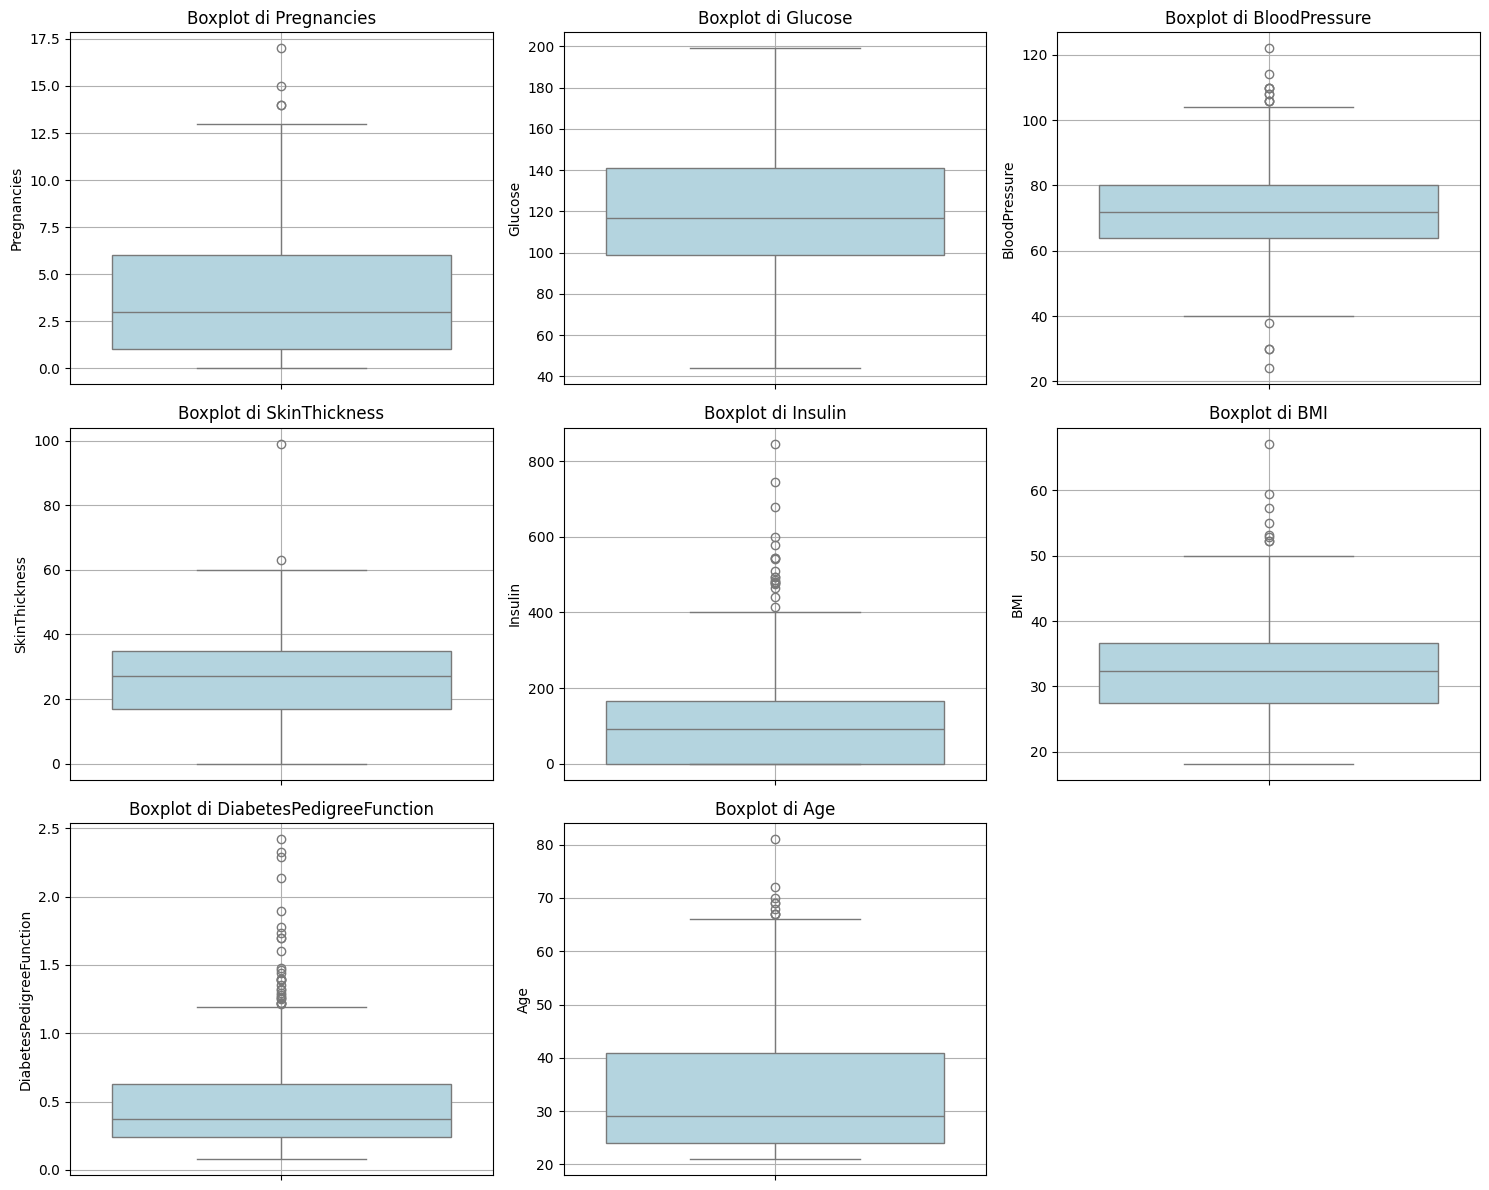

In [21]:
# Seleziona tutte le colonne numeriche (esclude 'Outcome' se è category)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Layout automatico per subplot
n = len(numeric_cols)
rows = (n + 2) // 3  # max 3 colonne per riga
cols = 3

plt.figure(figsize=(5 * cols, 4 * rows))  # Adatta la dimensione

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot di {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Conclusioni:
- Pregnancies:
  - Valori > 13 sono rari, ma clinicamente possibili nel caso di gravidanze multiple.

- Glucose:
  - Range da ~45 a ~200 è fisiologico.

- BloodPressure:
  - Valori < 30 sono dubbi, ma non impossibili.
  - Valori alti (fino a 122) sono plausibili in ipertensione.

- SkinThickness:
  - Il valore più alto è 99 ed è plausibile in persone obese, anche se raro.

- Insulin:
  - Outlier > 600 (fino a 850) possono causare varianza elevata, perciò meglio gestirli.

- BMI:
  - Outlier > 60–65: rari, ma possibili in casi di obesità grave.

- Age:
  - Outlier > 70–80 sono perfettamente realistici.

- DiabetesPedigreeFunction:
  - Valori > 2.0 sono plausibili (è un indice astratto).

Dunque, scegliemo di **gestire** il caso di **Insulin** con **Outlier > 600**.


In [22]:
df.loc[df["Insulin"] > 600, "Insulin"] = np.nan

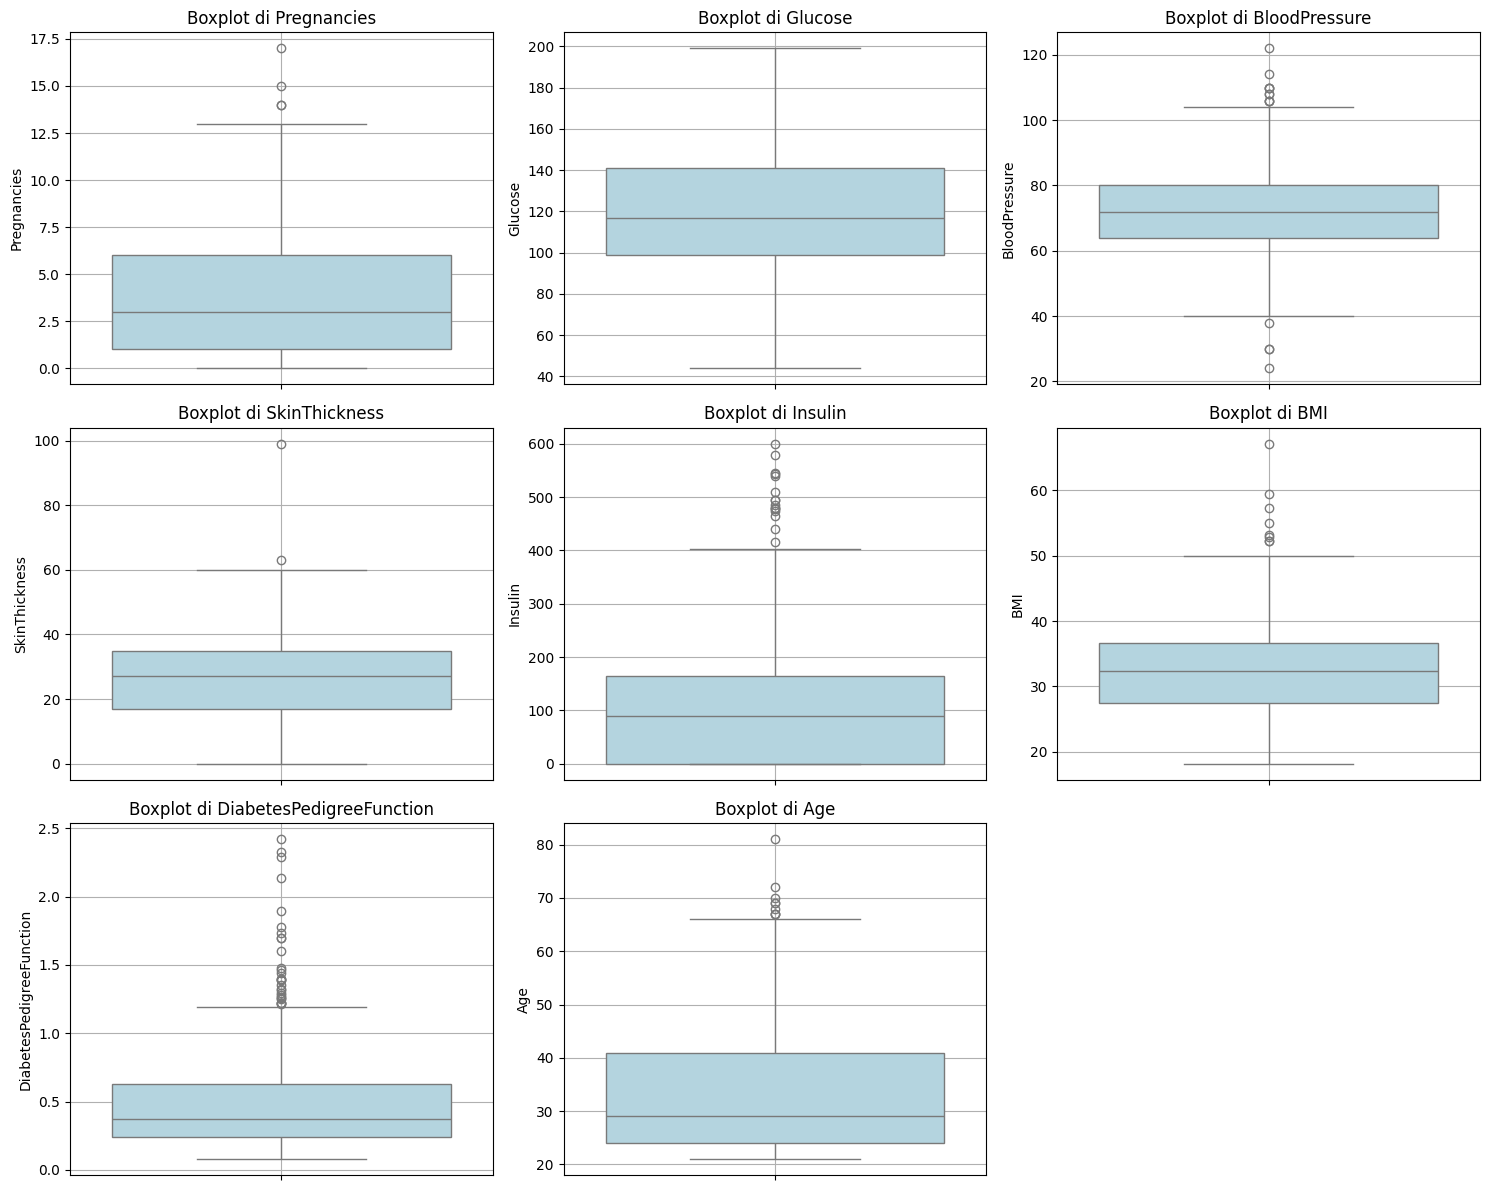

In [23]:
# Seleziona tutte le colonne numeriche (esclude 'Outcome' se è category)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Layout automatico per subplot
n = len(numeric_cols)
rows = (n + 2) // 3  # max 3 colonne per riga
cols = 3

plt.figure(figsize=(5 * cols, 4 * rows))  # Adatta la dimensione

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot di {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

#### **Split del dataset**

Dopo aver gestito i valori nulli e gli eventuali outlier, si suddivide il dataset in due blocchi:

- X_train, y_train: 70% dei dati usati per l'addestramento del modello;

- X_temp, y_temp: 30% dei dati, da suddividere ulteriormente in validation e test set (15% ciascuno).

Successivamente, si effettua un secondo split su X_temp, y_temp, ottenendo:

- X_val, y_val: 15% dei dati totali, usati per la validazione del modello;

- X_test, y_test: 15% dei dati totali, usati per il test finale.

In totale:

- Train set = 70%

- Validation set = 15%

- Test set = 15%

In [24]:
# Separazione X e y
X = df.drop("Outcome", axis=1) # tutte le feature
y = df["Outcome"] # la variabile target

# Primo split: 70% train, 30% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Secondo split: 50% val, 50% test da quel 30% (=> 15% ciascuno)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# 60% train, 20% val, 20% test
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (537, 8)
Validation set: (115, 8)
Test set: (116, 8)


#### **Introduzione di rumore nei dati: rumore nelle etichette e valori mancanti**

In questa fase, si combinano due tipi di rumore nei dati di addestramento:

- Label noise: una percentuale delle etichette binarie (0/1) viene invertita casualmente, simulando errori di classificazione o annotazione.

- Missing values: una percentuale casuale delle celle nel dataset delle feature viene sostituita con valori mancanti (NaN), simulando incompletezza nei dati raccolti.

Questa combinazione serve a stressare i modelli di machine learning, valutandone la robustezza in scenari realistici dove i dati possono essere sia sporchi nelle etichette che incompleti nelle feature.



In [25]:
def introduce_label_noise(y, noise_level, random_state=42):
    """
    Inverte le etichette di una percentuale dei campioni (es. da 0 a 1 o da 1 a 0).

    Parameters:
    - y: array o Series con etichette binarie
    - noise_level: percentuale di etichette da sporcare (es. 0.1 per 10%)
    - random_state: per riproducibilità

    Returns:
    - y_noisy: nuova versione di y con etichette sporche
    """
    np.random.seed(random_state)
    y_noisy = y.copy().to_numpy() if isinstance(y, pd.Series) else y.copy()

    n_samples = len(y_noisy)
    n_noisy = int(noise_level * n_samples)

    # Campioni da invertire
    noisy_indices = np.random.choice(n_samples, size=n_noisy, replace=False)

    # Inversione (0 <-> 1)
    y_noisy[noisy_indices] = 1 - y_noisy[noisy_indices]

    return y_noisy

In [26]:
def introduce_missing_values(X, missing_rate=0.1, random_state=42):
    """
    Introduce valori mancanti (NaN) in una percentuale casuale del DataFrame X.

    Parameters:
    - X: DataFrame delle feature
    - missing_rate: frazione di celle da rendere mancanti
    - random_state: seme per riproducibilità

    Returns:
    - X_missing: nuova versione di X con NaN
    """
    np.random.seed(random_state)
    X_missing = X.copy()

    n_rows, n_cols = X_missing.shape
    total_cells = n_rows * n_cols
    n_missing = int(missing_rate * total_cells)

    # Genera coordinate casuali per i NaN
    missing_row_indices = np.random.randint(0, n_rows, n_missing)
    missing_col_indices = np.random.randint(0, n_cols, n_missing)

    for r, c in zip(missing_row_indices, missing_col_indices):
        X_missing.iat[r, c] = np.nan

    return X_missing

Questa sezione del codice crea più versioni del dataset di training, introducendo due tipi distinti di rumore:

1. Rumore nelle etichette (Label Noise)
  - Si definiscono sei livelli di rumore, da 0% a 50%.

  - Per ogni livello, la funzione introduce_label_noise inverte casualmente una percentuale delle etichette binarie (y_train), simulando errori di classificazione.

  - Il risultato è un dizionario y_train_versions, dove ogni chiave (es. "noise_20%") corrisponde a un array di etichette alterate.

2. Valori mancanti nelle feature (Missing Values)
  - Anche qui si definiscono sei livelli, da 0% a 50% di celle mancanti.

  - Per ciascun livello, introduce_missing_values introduce valori NaN casuali nel DataFrame X_train, corrompendo una certa frazione dei dati.

  - Si ottiene un dizionario X_train_versions_missing, dove ogni chiave rappresenta un certo livello di dati mancanti (es. "missing_30%").

In [27]:
noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_train_versions = {
    f"noise_{int(n*100)}%": introduce_label_noise(y_train, noise_level=n, random_state=42)
    for n in noise_levels
}

In [28]:
missing_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
X_train_versions_missing = {
    f"missing_{int(m*100)}%": introduce_missing_values(X_train, missing_rate=m, random_state=42)
    for m in missing_levels
}

#### **Definizione delle pipeline e ricerca iperparametri**

Per ciascun classificatore considerato, è stata definita una pipeline completa utilizzando **ImbPipeline di imblearn**, che consente di includere nella sequenza anche tecniche di bilanciamento dei dati (come SMOTE). Ogni pipeline è composta da:

1. Imputazione avanzata dei valori mancanti (IterativeImputer) che stima i valori mancanti in base alle altre feature.

2. Trasformazioni sui dati:

- StandardScaler normalizza le feature (media 0, dev. std 1);

- PowerTransformer (in SVM e MLP) rende la distribuzione più simile a una normale.

3. Bilanciamento del dataset con SMOTE, per generare esempi sintetici della classe minoritaria.

4. Modello di machine learning (Decision Tree, Random Forest, SVM, MLP).

Per ciascuna pipeline, viene definito anche un **dizionario di iperparametri** (param_dist_...) da utilizzare in fase di tuning.

Di seguito la descrizione per ogni modello:

- pipeline_dt: Decision Tree
  - Si tratta del modello base ad albero decisionale.

  - Iperparametri principali:

    - max_depth: profondità massima dell’albero.

    - min_samples_split: minimo numero di campioni per dividere un nodo.

    - ccp_alpha: potatura post-pruning per evitare overfitting.

- pipeline_rf: Random Forest
  - Si tratta del modello ensemble di alberi, più robusto e preciso.

  - Iperparametri principali:

    - n_estimators: numero di alberi nella foresta.

    - max_depth, min_samples_split: come per l’albero decisionale.

    - max_features: numero di feature considerate a ogni split.

- pipeline_svm: Support Vector Machine
  - Si tratta del classificatore potente, particolarmente efficace con feature ben scalate.

  - Include PowerTransformer per migliorare la distribuzione delle variabili.

  - Iperparametri principali:

    - C: regolarizzazione del margine.

    - kernel: tipo di funzione kernel (lineare o RBF).

    - gamma: coefficiente del kernel RBF.

- pipeline_mlp: Multilayer Perceptron (rete neurale)
  - Si tratta del modello flessibile per apprendere anche relazioni non lineari.

  - Include PowerTransformer e StandardScaler per stabilizzare il training.

  - Iperparametri principali:

    - hidden_layer_sizes: struttura dei layer nascosti.

    - activation: funzione di attivazione.

    - alpha: termine di regolarizzazione L2.

Queste pipeline verranno poi utilizzate con RandomizedSearchCV per trovare la combinazione ottimale di iperparametri, valutando le prestazioni su più livelli di rumore nelle etichette.



In [29]:
pipeline_dt = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

param_dist_dt = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__ccp_alpha': [0.0, 0.001, 0.01]
}


pipeline_rf = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

param_dist_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['sqrt', 'log2']
}


pipeline_svm = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('power', PowerTransformer()),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(random_state=42))
])

param_dist_svm = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

pipeline_mlp = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('power', PowerTransformer()),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', MLPClassifier(random_state=42, max_iter=1000))
])

param_dist_mlp = {
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001, 0.01]
}

#### **Addestramento e valutazione dei modelli**

In questa fase, si esegue l’addestramento, ottimizzazione e valutazione dei modelli su diverse versioni del dataset di training, ciascuna con una combinazione specifica di rumore nelle etichette e valori mancanti nelle feature. L’obiettivo è valutare la robustezza dei modelli supervisionati in scenari realistici, in cui i dati di addestramento possono contenere errori sia nelle etichette (label noise) che incompletezza nei dati di input (missing values).

Ci sono 4 passi:

1. Organizzazione dei modelli e parametri:

  Tutti i modelli e le rispettive pipeline definite in precedenza (Decision Tree, Random Forest, SVM, MLP) sono organizzati in un dizionario models, assieme al relativo dizionario di iperparametri. Questo approccio consente di iterare sui modelli in modo compatto e modulare.

2. Addestramento iterativo con cross-validation

  Per ciascuna combinazione di rumore (es. 10% label noise + 10% missing), si procede come segue:

  - Si utilizza RandomizedSearchCV per cercare in modo efficiente i migliori iperparametri, testando 10 combinazioni casuali (n_iter=10) per ogni modello.

  - La validazione è condotta tramite StratifiedKFold (5-fold), che garantisce una distribuzione bilanciata delle classi in ogni fold.

  - L’addestramento avviene su X_train e su una versione modificata di y_train contenente rumore nelle etichette.

3. Valutazione del modello
  Dopo il fitting, ogni modello viene valutato su due set:

  - Validation set (X_val): per osservare l’accuratezza nel tuning.

  - Test set (X_test): per misurare la performance finale e confrontare tra i modelli.

  Per ogni modello vengono calcolate le seguenti metriche:

  - Accuracy, Precision, Recall, F1-score

  - Matrice di confusione per analizzare errori specifici

  - ROC curve e AUC (Area Under Curve), se disponibile (cioè se il modello fornisce probabilità o decision function)

4. Salvataggio dei risultati

  Tutti i risultati per ogni combinazione di modello e livello di rumore vengono salvati in un dizionario e raccolti in un DataFrame finale (results_df) che permette:

  - La comparazione sistematica tra modelli

  - L’analisi dell’effetto del rumore sulle metriche

  - La possibilità di effettuare visualizzazioni (grafici, curve ROC, boxplot, ecc.)



In [30]:
# Dizionario modelli e parametri
models = {
    "DecisionTree": (pipeline_dt, param_dist_dt),
    "RandomForest": (pipeline_rf, param_dist_rf),
    "SVM": (pipeline_svm, param_dist_svm),
    "MLP": (pipeline_mlp, param_dist_mlp)
}

# CV con stratificazione
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_results = []

combinations = [
    (0.0, 0.0),
    (0.1, 0.1),
    (0.2, 0.2),
    (0.3, 0.1),
    (0.1, 0.3),
    (0.4, 0.2),
    (0.2, 0.4),
    (0.5, 0.5)
]

for noise_label, noise_missing in combinations:
    label_key = f"label_{int(noise_label*100)}%"
    missing_key = f"missing_{int(noise_missing*100)}%"
    combined_key = f"{label_key}_missing_{missing_key}"

    print(f"\n==> Combinazione: {combined_key}")

    # Applica entrambi i tipi di rumore
    noisy_y = introduce_label_noise(y_train, noise_level=noise_label, random_state=42)
    X_noisy = introduce_missing_values(X_train, missing_rate=noise_missing, random_state=42)

    for name, (pipe, params) in models.items():
        print(f"  Modello: {name}")

        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=params,
            n_iter=10,
            scoring='accuracy',
            cv=cv,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )

        search.fit(X_noisy, noisy_y)

        val_pred = search.predict(X_val)
        test_pred = search.predict(X_test)

        precision = precision_score(y_test, test_pred)
        recall = recall_score(y_test, test_pred)
        f1 = f1_score(y_test, test_pred)
        acc_val = accuracy_score(y_val, val_pred)
        acc_test = accuracy_score(y_test, test_pred)
        conf_matrix = confusion_matrix(y_test, test_pred)

        # ROC
        model_final = search.best_estimator_.named_steps["model"]
        try:
            if hasattr(model_final, "predict_proba"):
                y_score = search.predict_proba(X_test)[:, 1]
            elif hasattr(model_final, "decision_function"):
                y_score = search.decision_function(X_test)
            else:
                y_score = None

            if y_score is not None:
                fpr, tpr, _ = roc_curve(y_test, y_score)
                roc_auc = roc_auc_score(y_test, y_score)
            else:
                fpr, tpr, roc_auc = None, None, None

        except Exception as e:
            print(f"Errore ROC per {name} con {combined_key}: {e}")
            fpr, tpr, roc_auc = None, None, None

        all_results.append({
            "Noise": combined_key,
            "Model": name,
            "Val_Accuracy": acc_val,
            "Test_Accuracy": acc_test,
            "Precision": precision,
            "Recall": recall,
            "F1_Score": f1,
            "Best_Params": search.best_params_,
            "Confusion_Matrix": conf_matrix,
            "FPR": fpr,
            "TPR": tpr,
            "AUC": roc_auc,
            "Label_Noise_Level": noise_label,
            "Missing_Level": noise_missing,
        })


# Converti in DataFrame
results_df = pd.DataFrame(all_results)

# Mostra tutte le righe e colonne (opzionale)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Visualizza il DataFrame
print(results_df)



==> Combinazione: label_0%_missing_missing_0%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



==> Combinazione: label_10%_missing_missing_10%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



==> Combinazione: label_20%_missing_missing_20%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



==> Combinazione: label_30%_missing_missing_10%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



==> Combinazione: label_10%_missing_missing_30%
  Modello: DecisionTree


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: RandomForest


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: SVM


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



==> Combinazione: label_40%_missing_missing_20%
  Modello: DecisionTree
  Modello: RandomForest
  Modello: SVM
  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



==> Combinazione: label_20%_missing_missing_40%
  Modello: DecisionTree


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: RandomForest


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: SVM


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



==> Combinazione: label_50%_missing_missing_50%
  Modello: DecisionTree


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: RandomForest


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: SVM


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


  Modello: MLP


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


                            Noise         Model  Val_Accuracy  Test_Accuracy  \
0     label_0%_missing_missing_0%  DecisionTree      0.773913       0.887931   
1     label_0%_missing_missing_0%  RandomForest      0.800000       0.862069   
2     label_0%_missing_missing_0%           SVM      0.808696       0.896552   
3     label_0%_missing_missing_0%           MLP      0.817391       0.870690   
4   label_10%_missing_missing_10%  DecisionTree      0.686957       0.758621   
5   label_10%_missing_missing_10%  RandomForest      0.782609       0.887931   
6   label_10%_missing_missing_10%           SVM      0.773913       0.836207   
7   label_10%_missing_missing_10%           MLP      0.686957       0.853448   
8   label_20%_missing_missing_20%  DecisionTree      0.704348       0.775862   
9   label_20%_missing_missing_20%  RandomForest      0.747826       0.810345   
10  label_20%_missing_missing_20%           SVM      0.800000       0.810345   
11  label_20%_missing_missing_20%       

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



#### **Matrici di correlazione in base al tipo di rumore e al tipo di modello usati**

Questa fase ha l’obiettivo di visualizzare le matrici di confusione per ogni combinazione di modello e livello di rumore introdotto (nelle etichette e nei dati mancanti) nel dataset di training.

Le matrici di confusione forniscono una rappresentazione dettagliata degli errori commessi dai modelli, mostrando:

- Quanti campioni sani sono stati correttamente riconosciuti (veri negativi);

- Quanti sono stati classificati erroneamente come diabetici (falsi positivi);

- E viceversa per i pazienti diabetici.

Righe valide trovate: 32
Modelli unici trovati: ['DecisionTree', 'MLP', 'RandomForest', 'SVM']


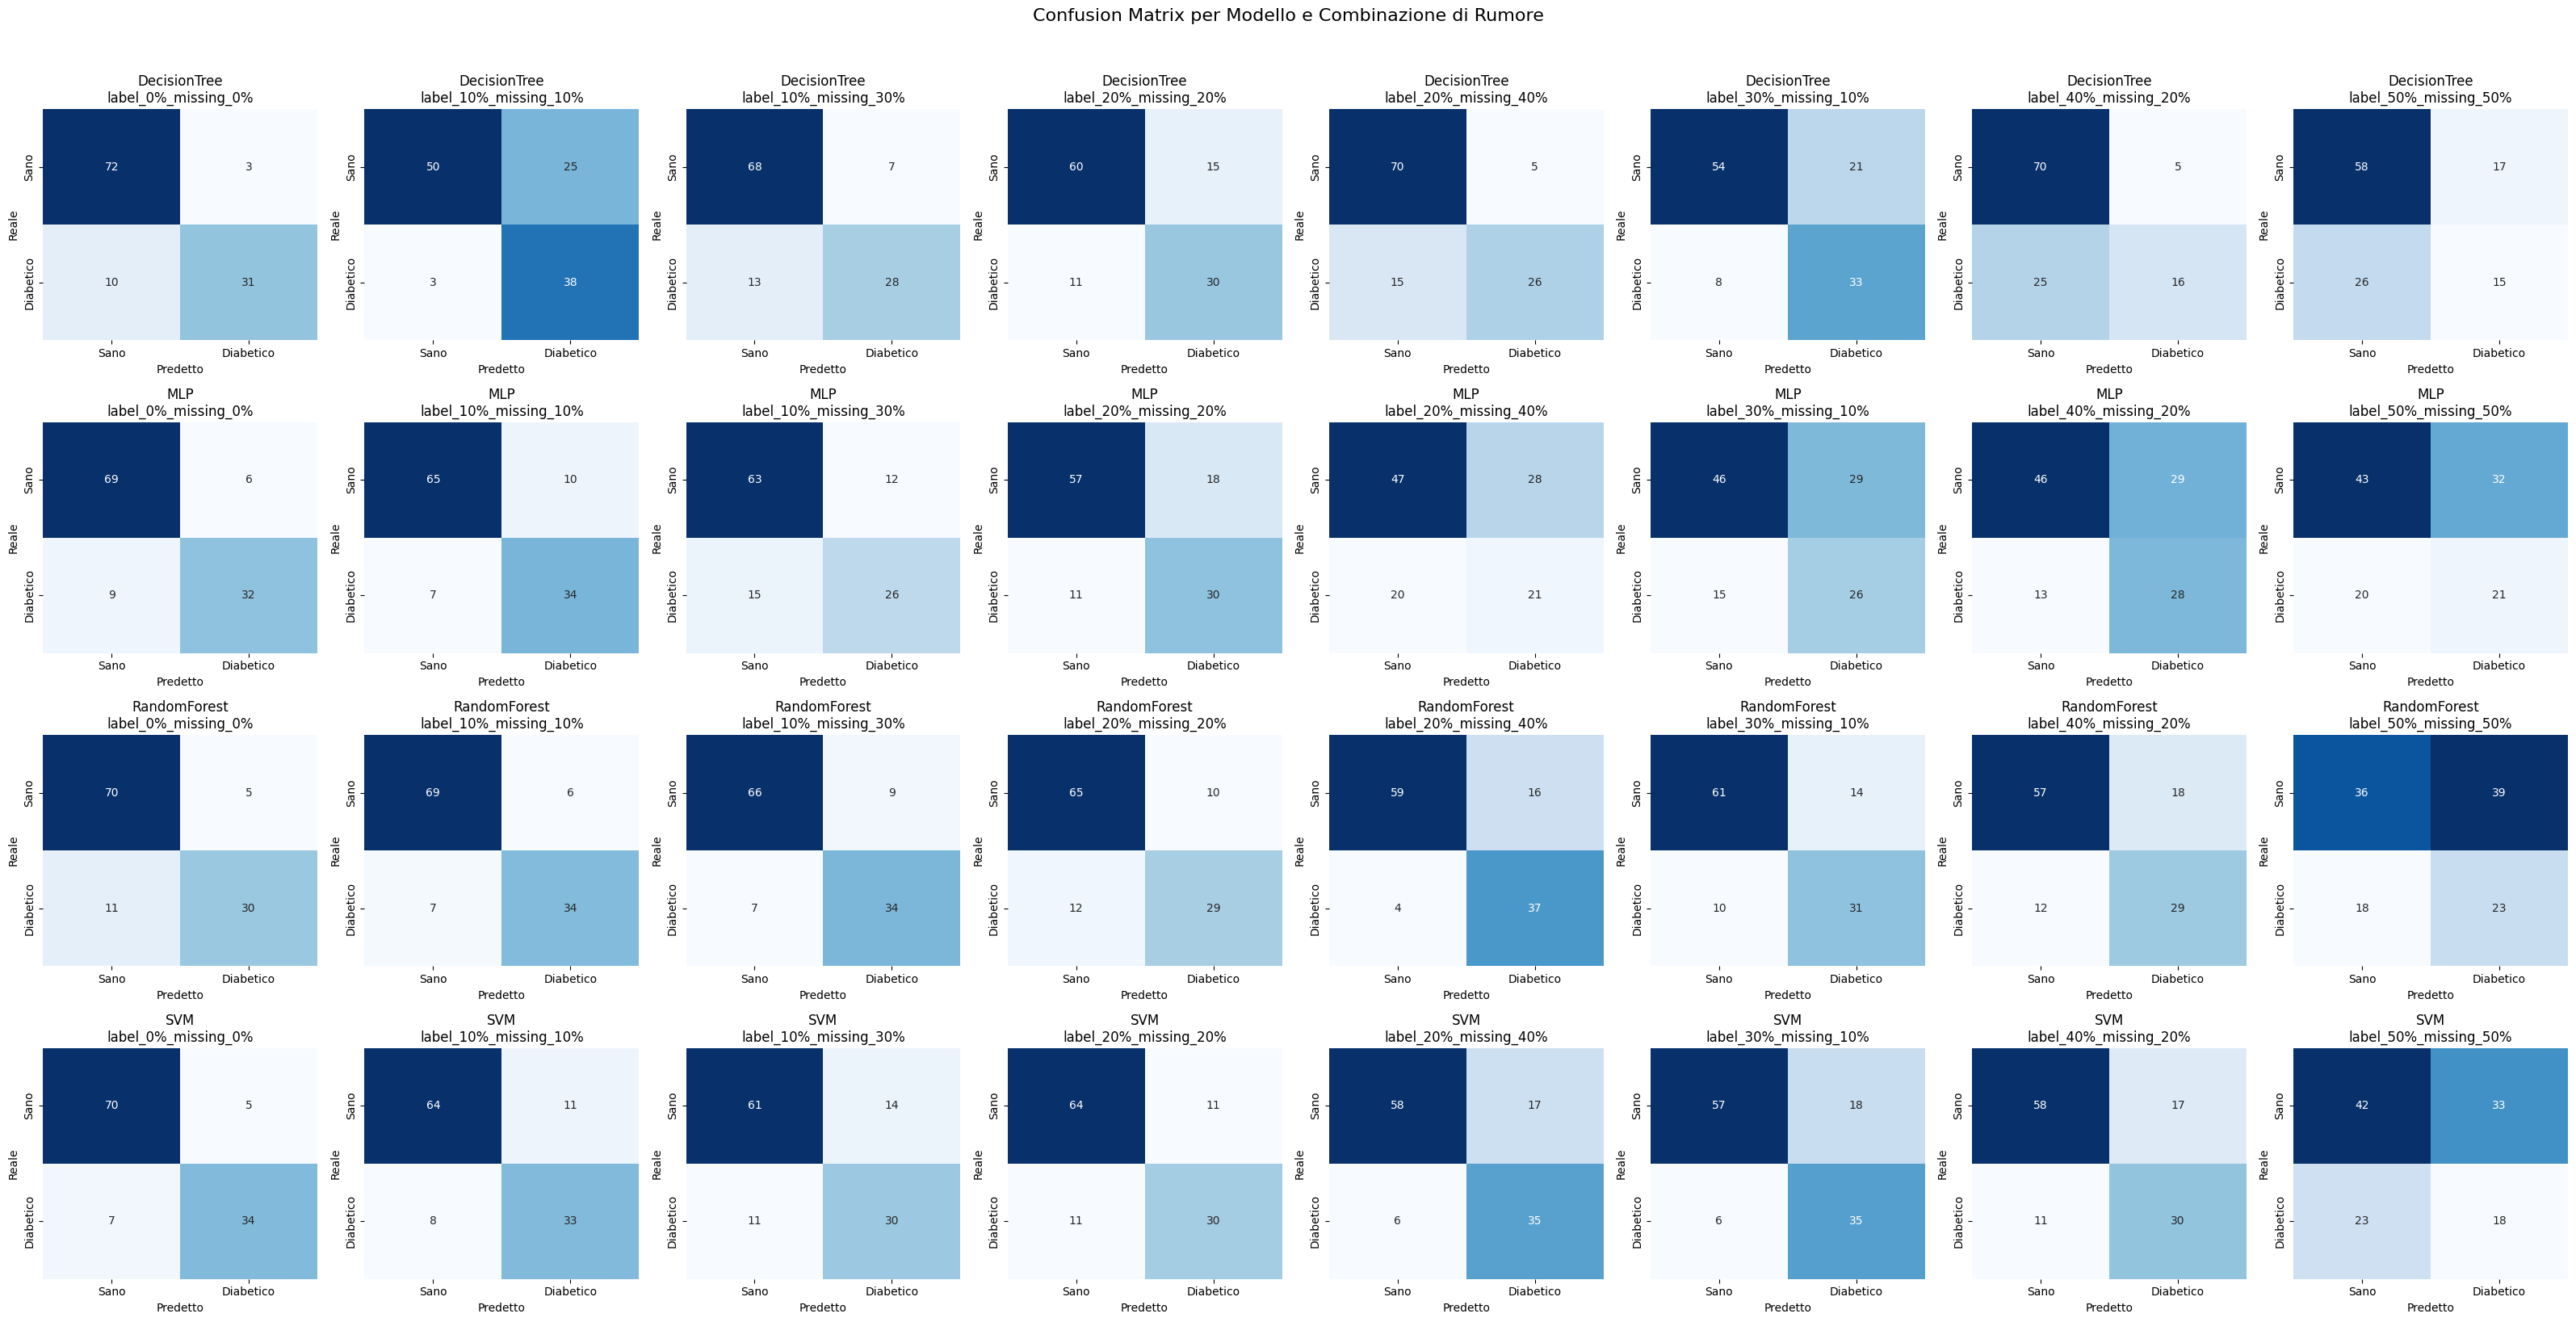

In [35]:
# Aggiungi colonna per CM valida
results_df["Noise"] = results_df.apply(
    lambda row: f"label_{int(row['Label_Noise_Level']*100)}%_missing_{int(row['Missing_Level']*100)}%",
    axis=1
)

# Filtra righe con CM valida
pattern_valido = r"^label_\d+%_missing_\d+%$"

valid_df = results_df[
    (results_df["has_cm"] == True) &
    (results_df["Noise"].str.match(pattern_valido, na=False))
]

# Ordina modelli e rumori combinati
modeli = sorted(valid_df["Model"].unique())

def parse_noise_key(noise_str):
    parts = noise_str.split("_")
    label = int(parts[1][:-1])
    missing = int(parts[3][:-1])
    return (label, missing)

rumori = sorted(valid_df["Noise"].unique(), key=parse_noise_key)


print("Righe valide trovate:", len(valid_df))
print("Modelli unici trovati:", modeli)


# Griglia confusion matrix
fig, axes = plt.subplots(len(modeli), len(rumori), figsize=(4*len(rumori), 4*len(modeli)))

for i, model in enumerate(modeli):
    for j, noise in enumerate(rumori):
        ax = axes[i, j] if len(modeli) > 1 else axes[j]
        row = valid_df[(valid_df["Model"] == model) & (valid_df["Noise"] == noise)]

        if not row.empty:
            cm = row.iloc[0]["Confusion_Matrix"]
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                        xticklabels=['Sano', 'Diabetico'],
                        yticklabels=['Sano', 'Diabetico'],
                        ax=ax)
            ax.set_title(f"{model}\n{noise}")
            ax.set_xlabel("Predetto")
            ax.set_ylabel("Reale")

plt.suptitle("Confusion Matrix per Modello e Combinazione di Rumore", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Perché è utile?
- Consente di identificare schemi di errore specifici per ciascun modello (es. un modello potrebbe essere più sensibile al rumore, aumentando i falsi positivi).

- Permette di confrontare visivamente l’impatto del rumore nelle etichette sulle prestazioni dei modelli.


### **Analisi dei risultati e visualizzazioni**


Dopo aver raccolto tutte le metriche di valutazione per ciascun modello e combinazione di rumore, questa sezione analizza e visualizza l’effetto complessivo del rumore sulle prestazioni.

L’obiettivo è identificare quali modelli siano più robusti e come l’aumento complessivo del rumore (etichette + valori mancanti) influenzi l’accuratezza sul test set.

Questo blocco del codice:

- Estrae i livelli numerici di label noise e missing values dalle etichette testuali.

- Calcola la somma dei due tipi di rumore in una colonna Total_Noise.

- Calcola, per ogni modello, la correlazione tra Total_Noise e accuratezza sul test set (Test_Accuracy).

- Il risultato, chiamato EPC (Error–Performance Correlation), indica quanto la performance del modello decresce all’aumentare del rumore totale:

  - EPC vicino a -1: il modello è molto sensibile al rumore.

  - EPC vicino a 0: il modello è robusto o poco influenzato.

  - EPC positivo: il rumore migliora artificialmente le metriche (overfitting possibile).

In [36]:
# Calcola EPC
results_df["Label_Noise_Level"] = results_df["Noise"].str.extract(r"label_(\d+)%").astype(float) / 100
results_df["Missing_Level"] = results_df["Noise"].str.extract(r"missing_(\d+)%").astype(float) / 100

results_df["Total_Noise"] = results_df["Label_Noise_Level"] + results_df["Missing_Level"]


epc_values = results_df.groupby("Model").agg(
    EPC=("Test_Accuracy", lambda acc: acc.corr(results_df.loc[acc.index, "Total_Noise"]))
)
epc_df = epc_values.reset_index()
epc_df["EPC"] = epc_df["EPC"].round(3)

# Visualizza la tabella
display(epc_df)

,Model,EPC
0,DecisionTree,-0.782
1,MLP,-0.884
2,RandomForest,-0.862
3,SVM,-0.915


Osservazioni su  EPC calcolati:
- MLP ha mostrato ottime performance in assenza di rumore, ma è anche il più fragile: la sua accuratezza peggiora drasticamente già con livelli moderati di rumore.

- Random Forest si conferma il modello più robusto al rumore tra quelli testati, mantenendo EPC meno negativo e performance stabili fino al 30–40% di rumore.

- SVM e Decision Tree presentano comportamenti intermedi, ma entrambi sono sensibili al rumore: peggiorano in modo significativo già ai primi livelli.


---
---

Il prosssimo blocco del codice visualizza l’andamento delle principali metriche di valutazione (Accuracy, Precision, Recall, F1-score) al crescere del rumore totale nei dati di addestramento (somma di label noise e missing values):

Per ogni metrica, il codice genera:

- Lineplot: mostra come cambia la metrica in funzione del rumore totale, per ciascun modello. Le etichette dell’asse X sono espresse in percentuale per maggiore leggibilità.

- Tabella affiancata al grafico: riepiloga i valori numerici medi della metrica per ciascun modello e ciascun livello di rumore.


Perché è utile:

- Consente di confrontare visivamente l’andamento delle prestazioni tra i diversi modelli.

- Aiuta a identificare quali modelli sono più stabili e quali metriche sono più sensibili all’aumento del rumore nei dati.

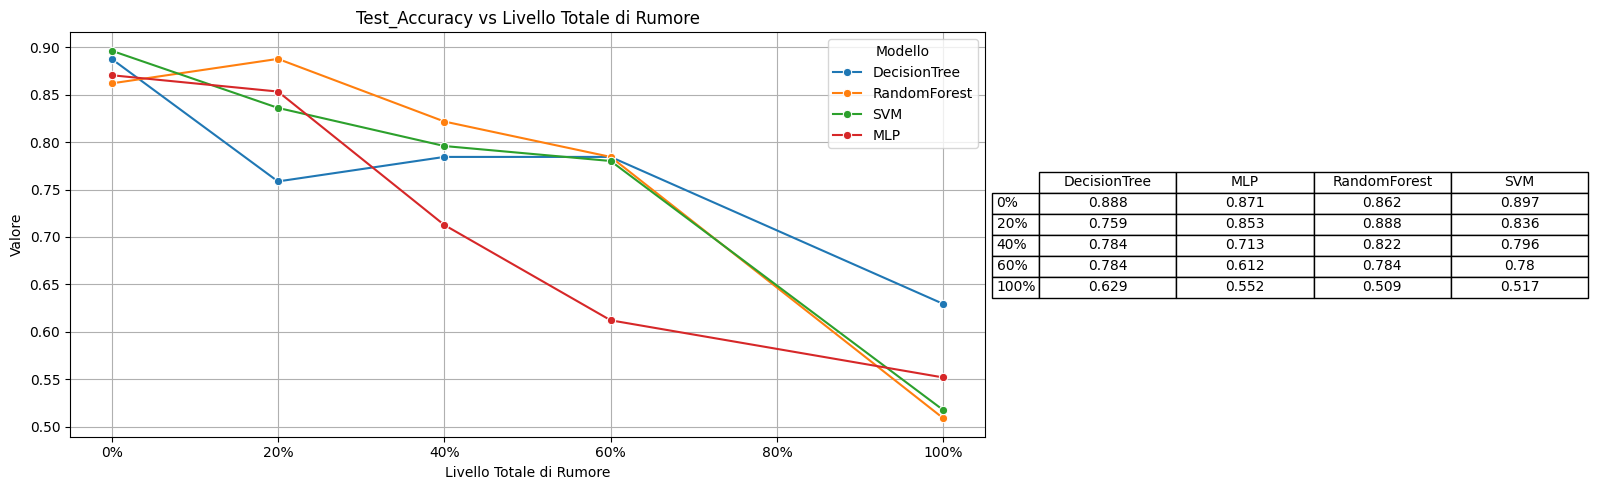

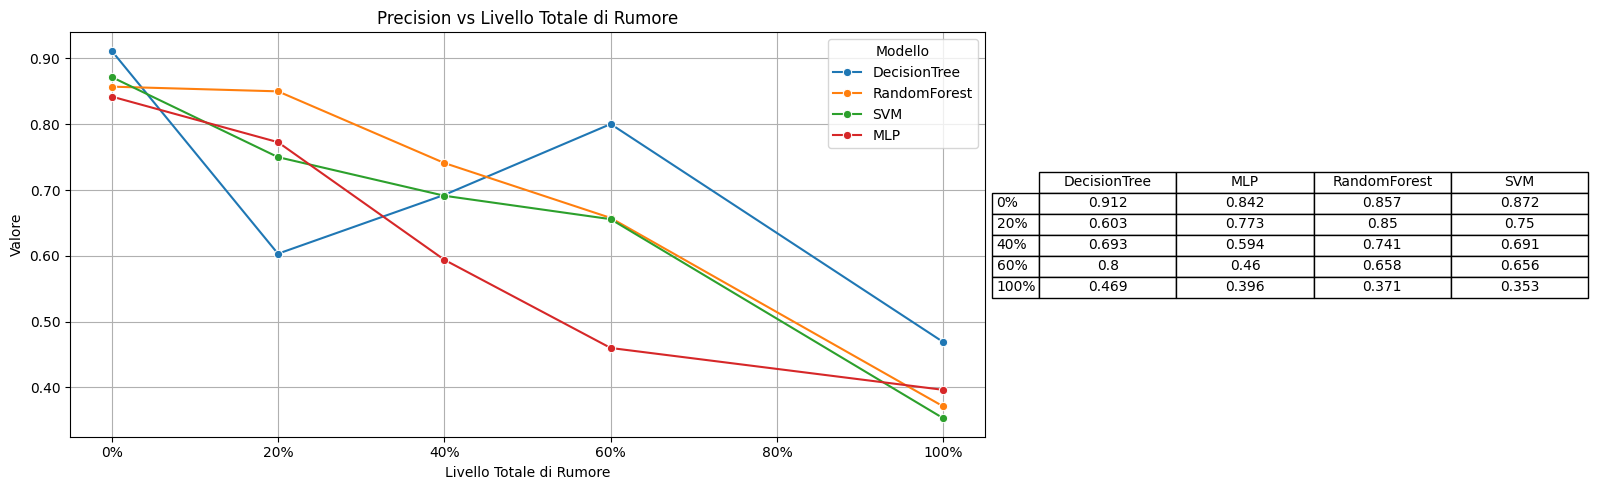

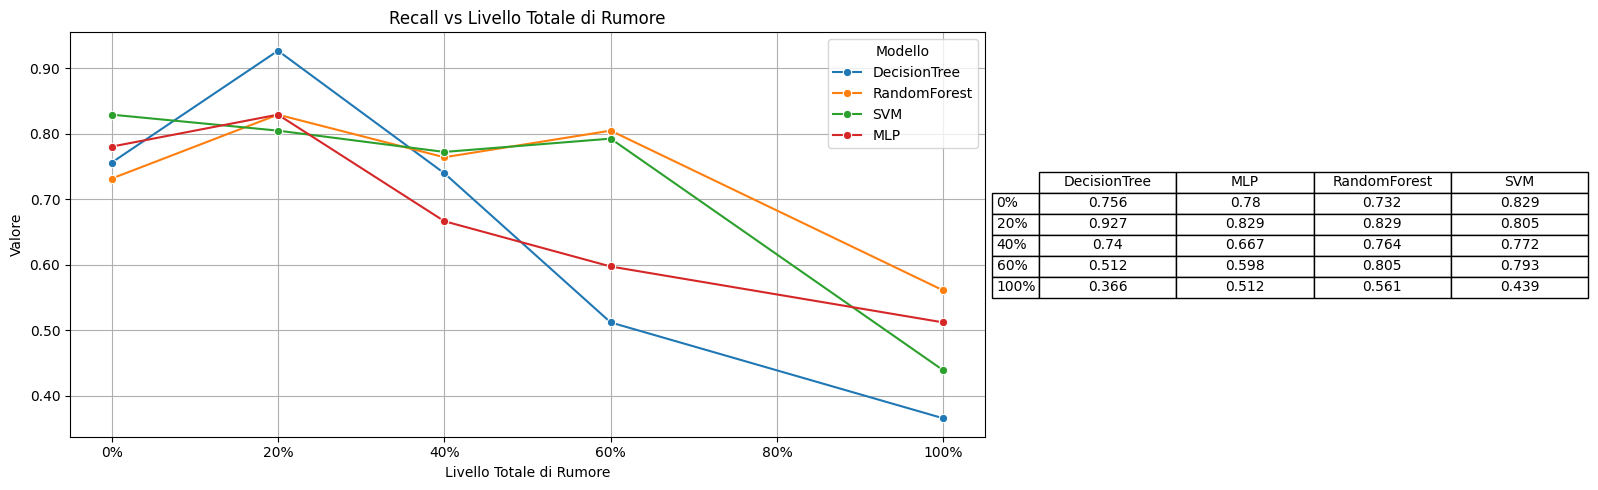

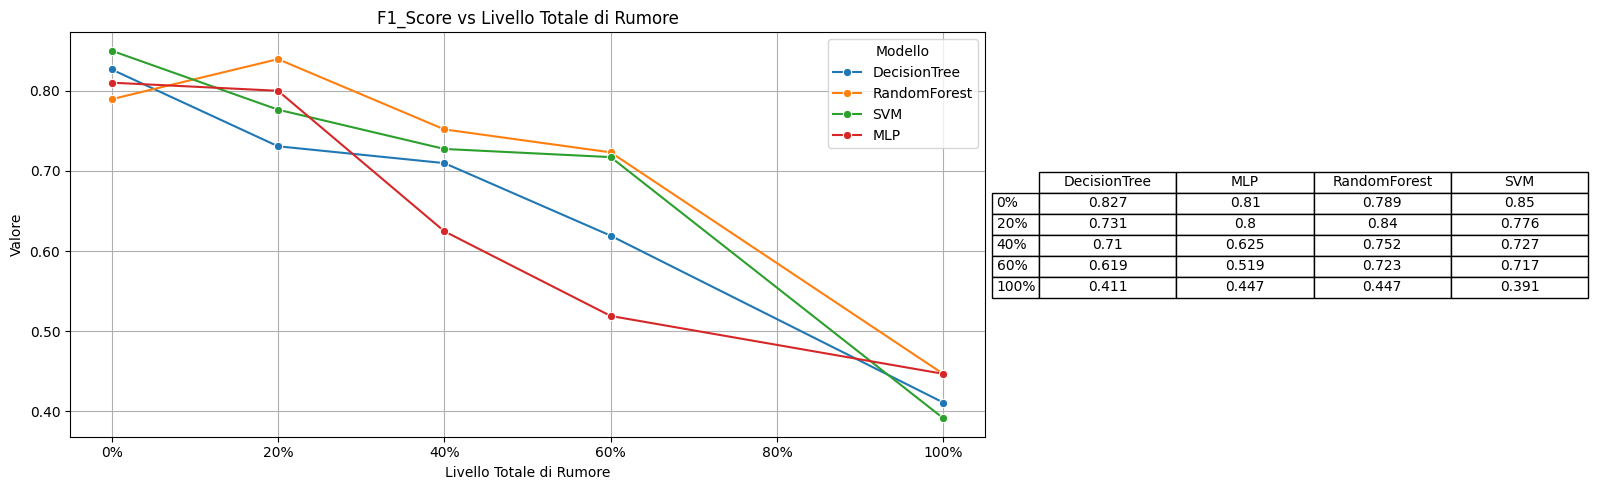

In [44]:
metriche = ["Test_Accuracy", "Precision", "Recall", "F1_Score"]

# Filtra righe con Total_Noise valido e senza metriche NaN
valid_plot_df = results_df[
    results_df["Total_Noise"].notna() & results_df[metriche].notna().all(axis=1)
]

for metrica in metriche:
    # Crea la figura con 2 colonne: 1 grafico + 1 tabella
    fig, axs = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios': [2, 1]})

    # --- GRAFICO ---
    sns.lineplot(data=valid_plot_df, x="Total_Noise", y=metrica, hue="Model", marker="o", ax=axs[0], errorbar=None)

    axs[0].set_title(f"{metrica} vs Livello Totale di Rumore")
    axs[0].set_xlabel("Livello Totale di Rumore")
    axs[0].set_ylabel("Valore")
    axs[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    axs[0].grid(True)
    axs[0].legend(title="Modello")

    # --- TABELLA ---
    pivot_data = valid_plot_df.groupby(["Total_Noise", "Model"])[metrica].mean().reset_index()
    tabella = pivot_data.pivot(index="Total_Noise", columns="Model", values=metrica)
    tabella = tabella.sort_index()  # Ordina per rumore crescente
    tabella.index = [f"{int(p*100)}%" for p in tabella.index]  # Converte X in percentuale
    axs[1].axis('off')  # Nasconde l'asse
    table = axs[1].table(cellText=tabella.round(3).values,
                         rowLabels=tabella.index,
                         colLabels=tabella.columns,
                         loc='center',
                         cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Mostra tutto
    plt.tight_layout()
    plt.show()


Osservazioni su lineplot e tabella accanto al grafico creati per ciascuna metrica (Accuracy, Precision, Recall, F1):
- Andamento generale
  - Tutti i modelli mostrano un calo di accuratezza progressivo all’aumentare del rumore (come previsto).

  - La decrescita non è sempre lineare: alcuni modelli resistono meglio fino a un certo punto, per poi crollare bruscamente.

Analisi per modello:

- Decision Tree
  - Inizia da 0.888 (0% rumore), cala lentamente fino a 0.741 (40%) e poi scende bruscamente a 0.638 (50%).

  - Ha un calo moderato e graduale, più regolare rispetto ad altri.

  - Moderatamente robusto fino al 30–40% di rumore.

- MLP
  - Inizia da 0.871, ma crolla in modo consistente: a 0.655 già al 30%, fino a 0.474 al 50%.

  - È il modello più vulnerabile al rumore.

  - Perde stabilità molto prima rispetto agli altri.

- Random Forest
  - Inizia a 0.862, resta stabile fino al 20% (0.871), poi cala vistosamente a 0.543 al 50%.

  - Mostra buona robustezza fino al 30%, poi si deteriora.

  - Tra i più affidabili in presenza di rumore moderato.

- SVM
  - Parte da 0.897, il valore iniziale più alto.

  - Scende lentamente fino al 30% (0.819), poi cala più marcatamente a 0.638.

  - Sensibile ma abbastanza stabile fino al 30%.
---
---

Questo blocco del codice genera due grafici per ogni modello, con l’obiettivo di analizzare in dettaglio l’andamento delle performance al crescere del rumore nei dati:

- Lineplot combinato: mostra tutte le metriche (Accuracy, Precision, Recall, F1-score) su un unico grafico, facilitando il confronto interno per ciascun modello.

- Barplot raggruppato: visualizza i valori medi delle metriche per ogni livello di rumore totale, permettendo un’interpretazione immediata dei risultati numerici.



Perché è utile:

 - Aiuta a identificare quali metriche sono più sensibili all’aumento del rumore per ogni modello.

 - Mostra quale modello mantiene meglio le performance anche in presenza di dati rumorosi.

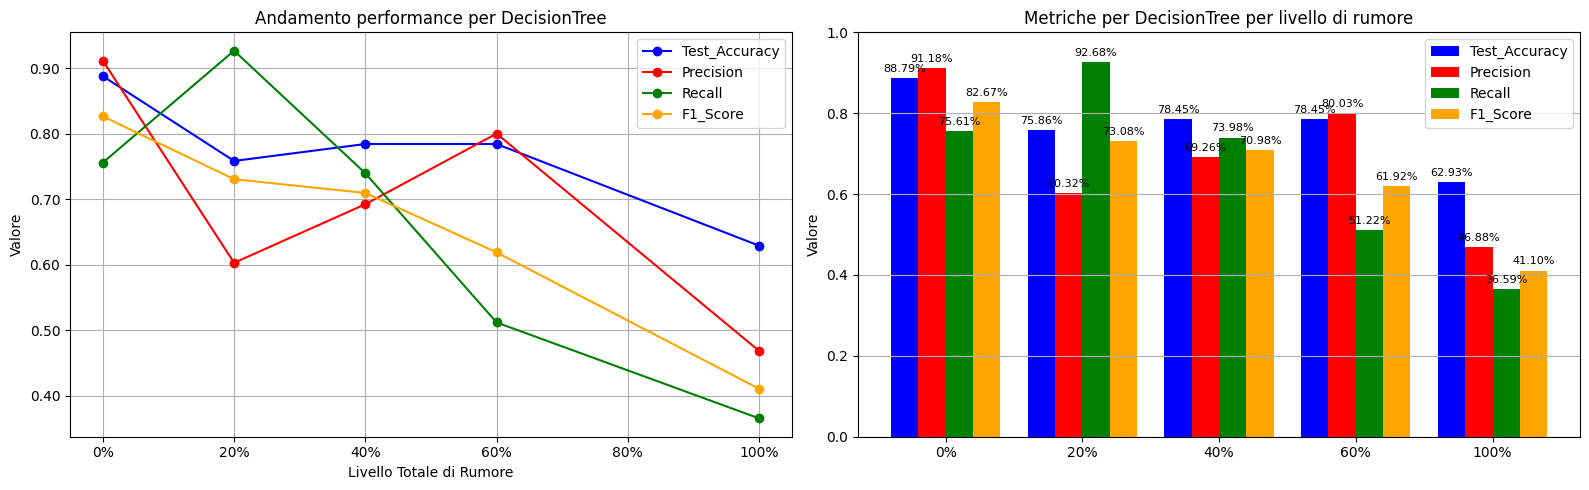

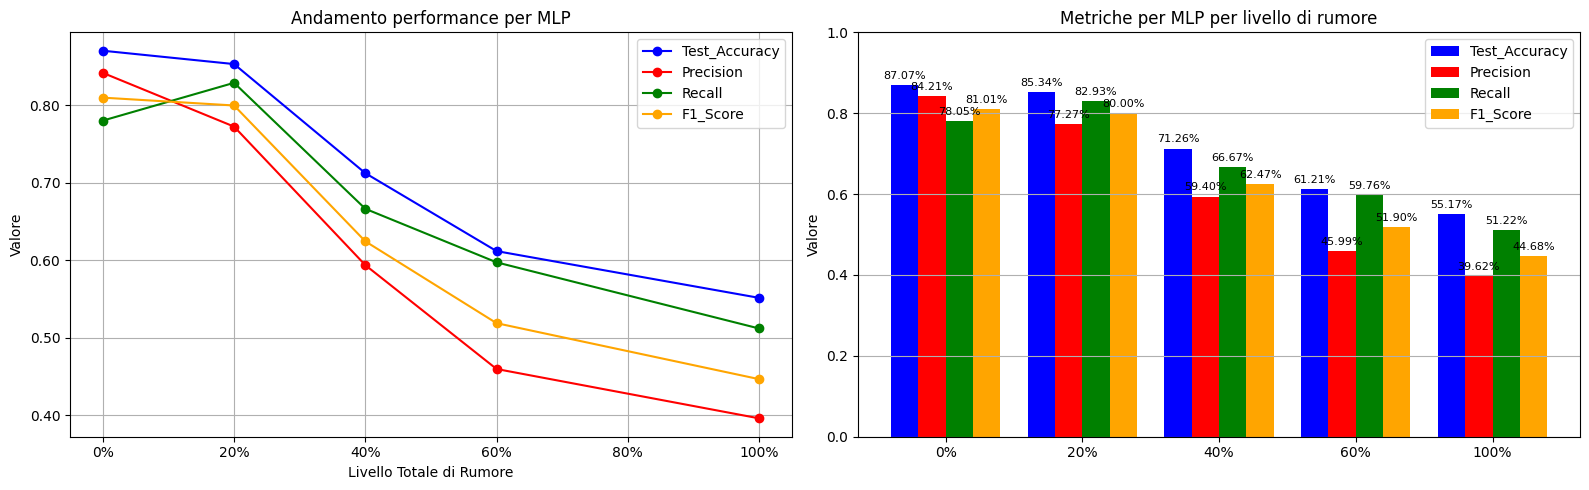

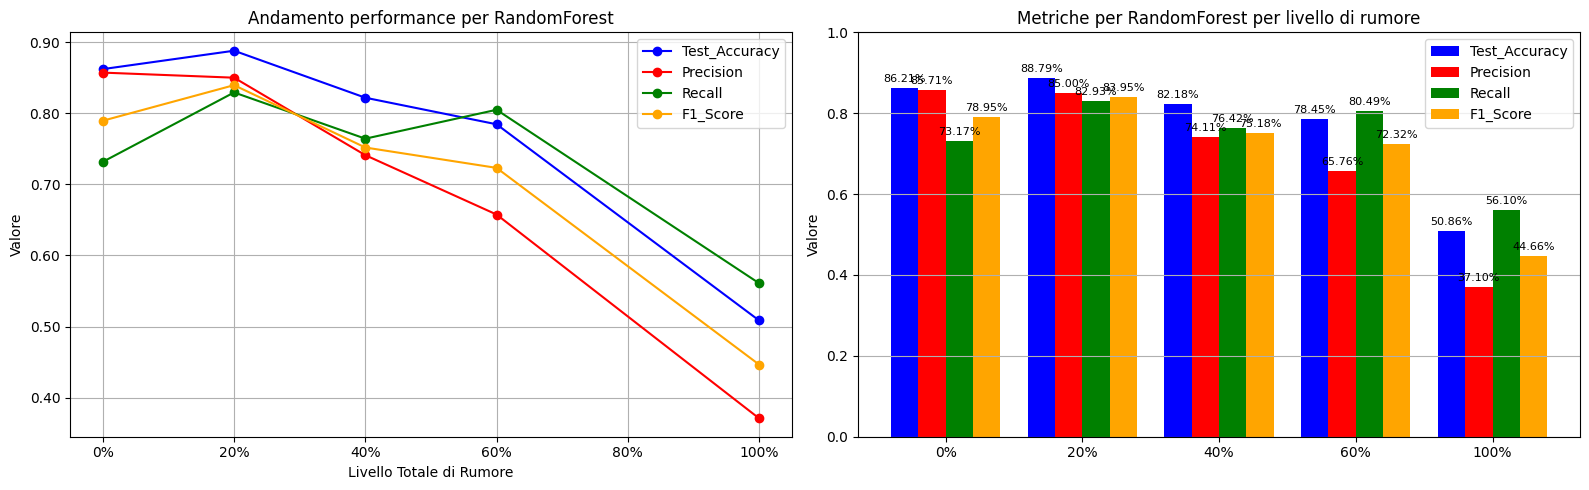

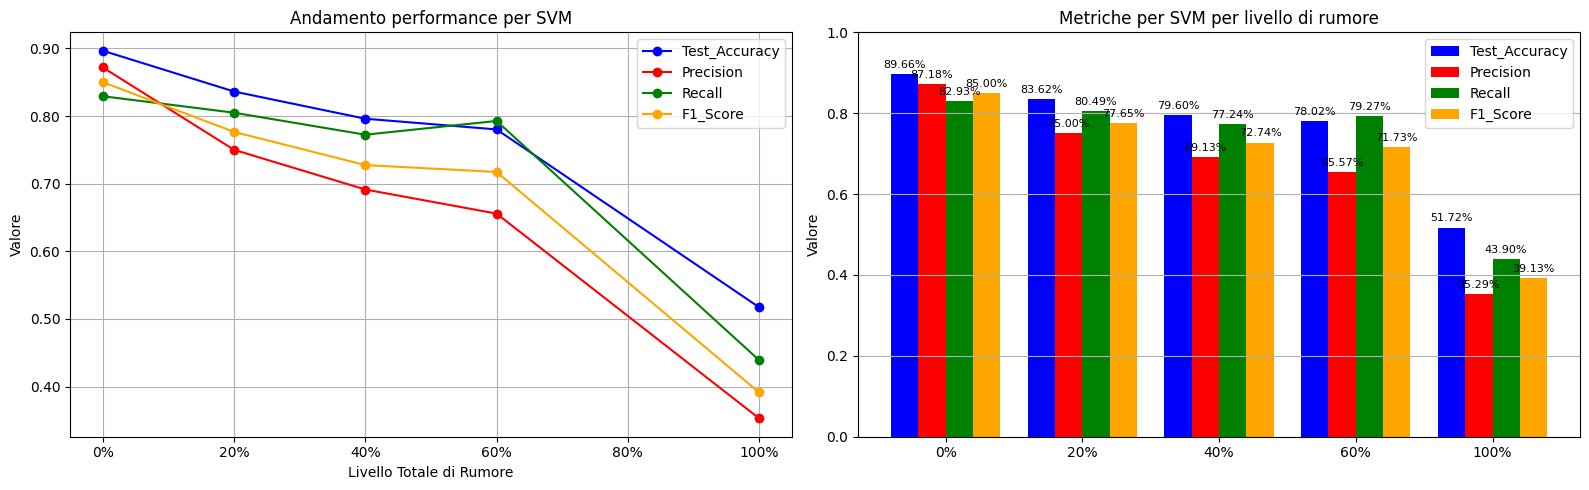

In [48]:
# Palette colori coerente
colori_metriche = {
    "Test_Accuracy": "blue",
    "Precision": "red",
    "Recall": "green",
    "F1_Score": "orange"
}

metriche = list(colori_metriche.keys())

# 🔧 STEP 1: Aggrega il dataframe per Model + Total_Noise
aggregated_df = results_df.groupby(["Model", "Total_Noise"], as_index=False)[metriche].mean()

# (facoltativo) aggiungi label percentuale per asse x o debug
aggregated_df["Total_Noise_Label"] = aggregated_df["Total_Noise"].apply(lambda x: f"{int(x * 100)}%")

# Modelli unici da dati aggregati
modelli = aggregated_df["Model"].unique()

# 🔁 STEP 2: Grafico per ogni modello
for model in modelli:
    dati_modello = aggregated_df[aggregated_df["Model"] == model].sort_values(by="Total_Noise")

    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    # ------------------ LINEPLOT ------------------
    for metrica in metriche:
        x = dati_modello["Total_Noise"]
        y = dati_modello[metrica]
        color = colori_metriche[metrica]
        axs[0].plot(x, y, label=metrica, marker="o", color=color)

    axs[0].set_title(f"Andamento performance per {model}")
    axs[0].set_xlabel("Livello Totale di Rumore")
    axs[0].set_ylabel("Valore")
    axs[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    axs[0].legend()
    axs[0].grid(True)

    # ------------------ BARPLOT RAGGRUPPATO ------------------
    bar_width = 0.2
    noise_levels = dati_modello["Total_Noise"].values
    x = np.arange(len(noise_levels))

    for i, metrica in enumerate(metriche):
        y_vals = dati_modello[metrica].values
        axs[1].bar(x + i * bar_width, y_vals, width=bar_width, color=colori_metriche[metrica], label=metrica)

        # Etichette percentuali sopra le barre
        for xi, yi in zip(x + i * bar_width, y_vals):
            axs[1].text(xi, yi + 0.015, f"{yi:.2%}", ha='center', fontsize=8)

    axs[1].set_xticks(x + bar_width * 1.5)
    axs[1].set_xticklabels([f"{int(n * 100)}%" for n in noise_levels])
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f"Metriche per {model} per livello di rumore")
    axs[1].set_ylabel("Valore")
    axs[1].legend()
    axs[1].grid(True, axis='y')

    plt.tight_layout()
    plt.show()


Osservazioni sul confronto delle metriche per singolo modello:
- Andamento generale
  - Tutti i modelli mostrano un calo di accuratezza progressivo all’aumentare del rumore (come previsto).

  - La decrescita non è sempre lineare: alcuni modelli resistono meglio fino a un certo punto, per poi crollare bruscamente.

Analisi per modello:

- Decision Tree
  - Prestazioni iniziali molto buone: accuracy sopra 88%, precision perfino superiore al 91%.

  -Comportamento instabile alle prime variazioni di rumore: oscillazioni marcate soprattutto su Precision e Recall.

  -Elevata sensibilità oltre il 30% di rumore, con Recall che crolla al 36% al 40% di rumore e rimane molto basso al 50%.

  - Il F1-score cala progressivamente, indicando deterioramento nella capacità di bilanciare precision e recall.

- Random Forest
  - Modello più stabile fino al 20%: tutte le metriche sopra l’80%, Recall addirittura cresce.

  - Inizia a degradare dal 30% in poi, ma più lentamente rispetto a Decision Tree.

  - Al 50% di rumore le prestazioni si abbassano, ma il modello mantiene ancora una struttura di previsione accettabile (accuracy ~54%, F1-score ~48%).

  - Miglior compromesso tra prestazioni e robustezza.


- SVM
  - Miglior accuratezza iniziale (circa 90%), con buon bilanciamento tra precision e recall.

  - Subisce fluttuazioni a 10–20% di rumore, ma recupera stabilità temporanea al 30%.

  - Dopo il 30%, crollo evidente, soprattutto su Recall e F1-score (che scendono sotto 50% al 50% di rumore).

  - Preciso ma sensibile: le decision boundaries si sporcano facilmente con etichette sbagliate.

  
- MLP
  - Buone prestazioni iniziali, ma leggermente inferiori agli altri (accuracy ~87%).

  -  Mostra un calo costante e progressivo in tutte le metriche già dal 10% di rumore.

  - È il modello più sensibile al rumore: Precision scende sotto il 40% al 50% di rumore, F1-score appena sopra il 37%.

  - Le prestazioni si deteriorano in modo uniforme → segno che l’apprendimento è fortemente compromesso dalle etichette errate.


Conclusione generale:

  - Random Forest si conferma il modello più robusto e consistente: è la scelta migliore quando si sospetta che i dati possano contenere errori di etichettatura.

  - Decision Tree ha prestazioni iniziali ottime, ma soffre di fluttuazioni imprevedibili a causa della sua natura sensibile ai singoli campioni.

  - SVM è forte con dati puliti, ma degrada drasticamente con il rumore, perdendo potere predittivo.

  - MLP è il modello più penalizzato dal rumore: sebbene potente in teoria, ha bisogno di dati puliti per dare il meglio.
---
---

Questo blocco del codice visualizza le curve ROC per ciascun modello, in funzione dei diversi livelli di rumore presenti nei dati di addestramento.

Più precisamente:

- Per ogni modello, viene tracciata una curva ROC riferita ai risultati su X_test, per ogni combinazione di rumore nelle etichette e valori mancanti.

- Ogni curva è accompagnata dal relativo valore AUC, che rappresenta l’area sotto la curva ROC.

- La linea tratteggiata diagonale rappresenta il comportamento di un classificatore casuale (baseline), utilizzata come riferimento minimo di qualità.

Perché è utile:

- La curva ROC mostra la capacità del modello di distinguere tra le due classi, indipendentemente dalla soglia di decisione adottata.

- Il valore AUC (Area Under Curve) fornisce una misura robusta dell’efficacia del classificatore: più è vicino a 1, migliore è la capacità di discriminazione.

- Il confronto tra le curve ROC per diversi livelli di rumore permette di osservare quanto e come il rumore degrada la performance del classificatore.

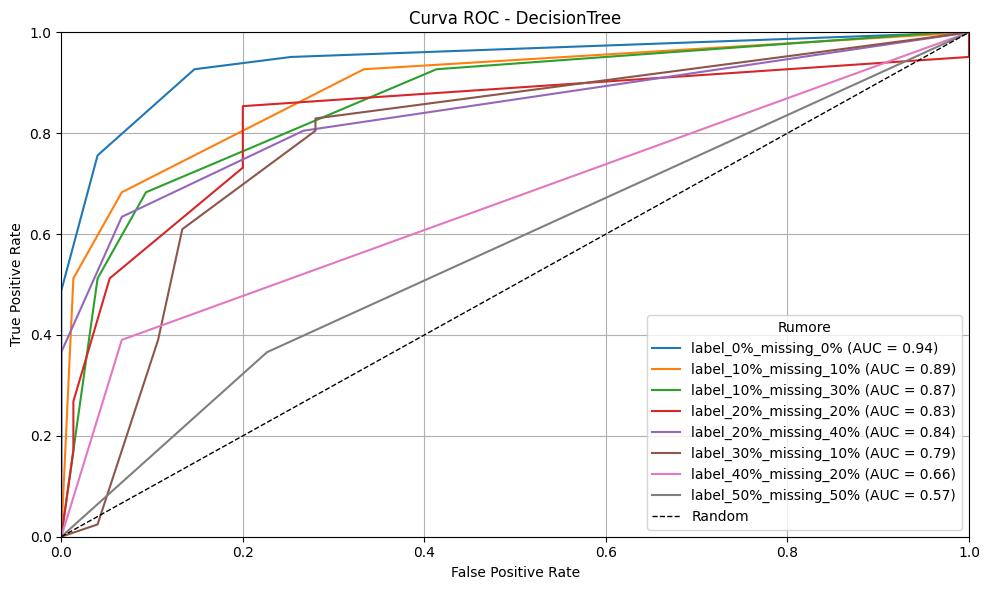

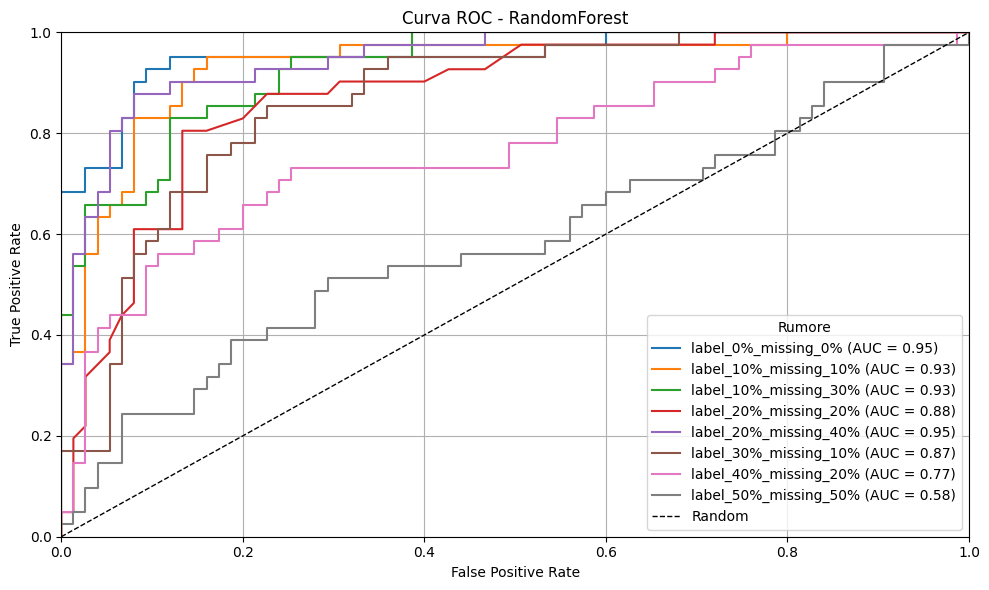

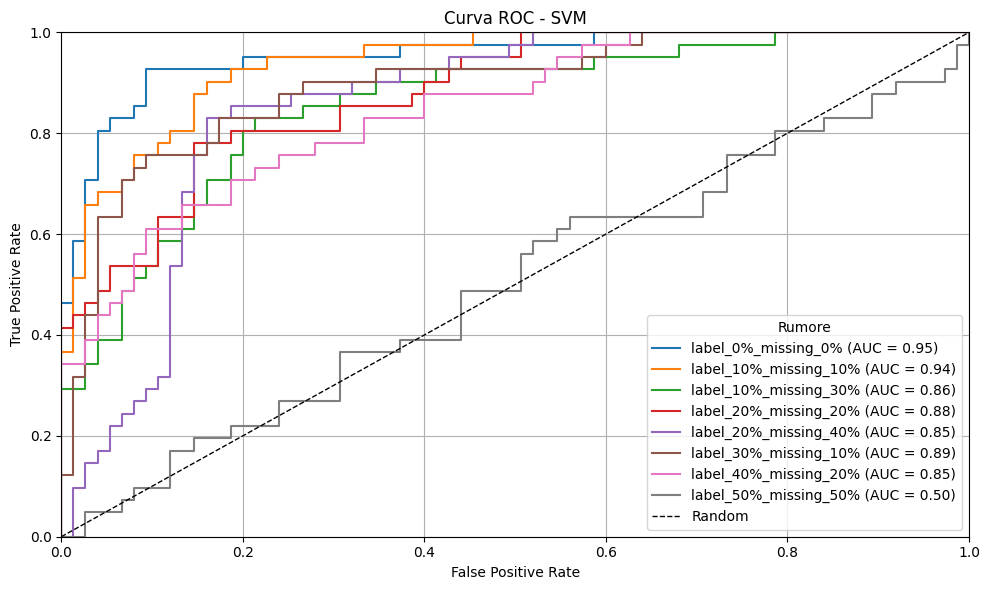

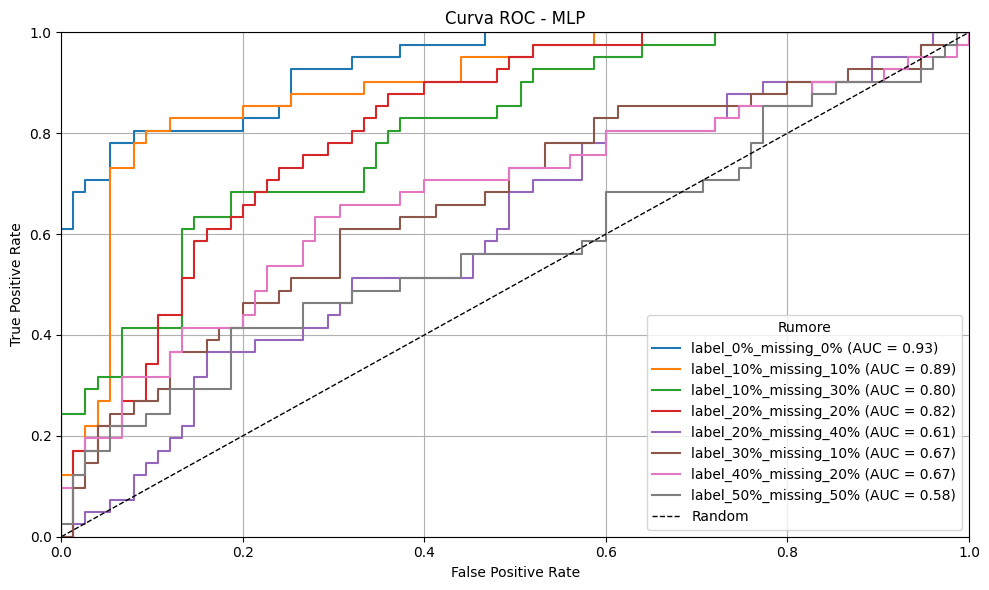

In [49]:
import ast

# --- Correggi FPR e TPR se salvati come stringhe ---
results_df["FPR"] = results_df["FPR"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
results_df["TPR"] = results_df["TPR"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# --- Filtra righe con FPR/TPR validi e AUC non nullo ---
valid_df = results_df[
    results_df["FPR"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) > 0) &
    results_df["TPR"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) > 0) &
    results_df["AUC"].notna()
]

# --- Estrai modelli e ordina livelli di rumore ---
modelli = valid_df["Model"].unique()

def parse_noise_key(noise_str):
    parts = noise_str.split("_")
    label = int(parts[1][:-1])
    missing = int(parts[3][:-1])
    return (label, missing)

rumori = sorted(valid_df["Noise"].unique(), key=parse_noise_key)

# --- Plot ROC curve per ciascun modello ---
for model in modelli:
    plt.figure(figsize=(10, 6))
    dati_modello = valid_df[valid_df["Model"] == model]

    for noise_label in rumori:
        row = dati_modello[dati_modello["Noise"] == noise_label]
        if row.empty:
            continue

        # Prendi la riga con AUC più alta (in caso di repliche)
        best_row = row.sort_values("AUC", ascending=False).iloc[0]
        fpr = best_row["FPR"]
        tpr = best_row["TPR"]
        auc = best_row["AUC"]

        if fpr is None or tpr is None or auc is None:
            continue

        plt.plot(fpr, tpr, label=f"{noise_label} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')  # baseline
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f"Curva ROC - {model}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(title="Rumore")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Conclusioni basate sulle curve ROC e AUC:

1. Decision Tree perde capacità discriminante in modo progressivo ma sensibile. È fragile oltre il 30%.

2. Random Forest è il modello più robusto in termini di AUC. Resiste fino al 30% e degrada più lentamente.

3. SVM è ottimo con dati puliti, stabile fino al 30%, ma sensibile al rumore più elevato. Tiene meglio del Decision Tree, peggio del Random Forest.

4. MLP è il modello più colpito dal rumore. AUC crolla sotto 0.5 a 50%, segno che la rete neurale perde completamente la capacità di distinguere le classi.

---
---


## **Conclusioni finali**

L’analisi combinata di EPC, metriche di valutazione (Accuracy, Precision, Recall, F1-score) e curve ROC/AUC ha permesso di valutare come ciascun modello reagisce all’introduzione progressiva di rumore nelle etichette di training. I risultati evidenziano comportamenti differenziati in termini di robustezza, stabilità e capacità discriminante.

Random Forest – il più robusto
- Resiste bene fino al 30% di rumore, mantenendo valori elevati in tutte le metriche, AUC superiori a 0.89, e un EPC relativamente meno negativo.

- La robustezza deriva dalla natura ensemble del modello: ciascun albero lavora su un sottoinsieme casuale dei dati, rendendo la foresta nel complesso meno sensibile agli errori di etichetta.

- Anche con rumore al 50%, mantiene una struttura predittiva accettabile.

**Conclusione:** miglior compromesso tra performance iniziali e resilienza al rumore.

---

SVM – preciso, ma sensibile oltre il 30%
- Ottimo con dati puliti: accuracy iniziale tra le più alte, AUC > 0.94.

- Tiene bene fino al 20–30% di rumore, ma mostra un crollo nelle metriche (soprattutto recall e F1) oltre tale soglia.

- Il motivo risiede nella sensibilità del margine decisionale: anche pochi errori nelle etichette possono spostare i support vector e quindi alterare l’iperpiano di separazione.


**Conclusione:** adatto se si è certi della qualità dei dati.

---

Decision Tree – prestazioni buone ma fluttuanti
- Inizialmente molto accurato e preciso, ma oscilla molto anche con poco rumore.

- Subisce crolli marcati su recall e F1 già oltre il 30%.

- Il problema è nella natura greedy e locale dell’algoritmo: le scelte di split sono molto sensibili ad anomalie nei dati.

**Conclusione:** discreto con poco rumore, ma instabile se le etichette non sono affidabili.

---

MLP – il più penalizzato
- Anche se parte con buone prestazioni, è il modello più sensibile al rumore.

- Calo progressivo e regolare in tutte le metriche già dal 10% di rumore; AUC sotto 0.5 a 50%.

- Questo comportamento è dovuto alla propagazione dell’errore nel training: la rete tende a sovra-adattarsi a etichette sbagliate, compromettendo tutta la funzione decisionale.

**Conclusione:** inadatto in presenza anche moderata di rumore nelle etichette.

Di conseguenza si deduce che Random Forest è la scelta più affidabile in contesti reali dove il rumore nelle etichette è possibile o probabile, mentre modelli come MLP e SVM richiedono dati accuratamente etichettati per esprimere il loro potenziale. La scelta del modello dovrebbe quindi tenere conto non solo della performance “a dati puliti”, ma anche della sua robustezza al label noise.

